## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Copper_Set.csv')
df.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12008\668035299.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Copper_Set.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


## DATA CLEANING:

 ## Checking for duplicate rows

In [5]:
a=len(df)
print('Original dataframe length',a)
df.drop_duplicates(inplace=True)
b=len(df)
print('Dataframe length after dropping duplicate rows',b)
print('No of duplicate rows removed',a-b)

Original dataframe length 181673
Dataframe length after dropping duplicate rows 181673
No of duplicate rows removed 0


## Identifying unwanted rows and replacing the corresponding values as NaN in 'material_ref' column

In [6]:
u=df[df.material_ref.str.contains("00000000000000000000",na=False)].material_ref.value_counts().index
print('No. of rows to be replaced as "NaN" in "material_ref" column: ',len(u))

No. of rows to be replaced as "NaN" in "material_ref" column:  5061


In [7]:
# Im replacing the rows containing '00000000000' values in the 'material_ref' column as 'NaN'


df.loc[df['material_ref'].str.contains('00000000000000000000',na=False), 'material_ref'] = np.nan


In [8]:
len(df)

181673

## Checking for correlation between features

C:\Users\DELL\AppData\Local\Temp\ipykernel_12008\52988660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr().round(2)


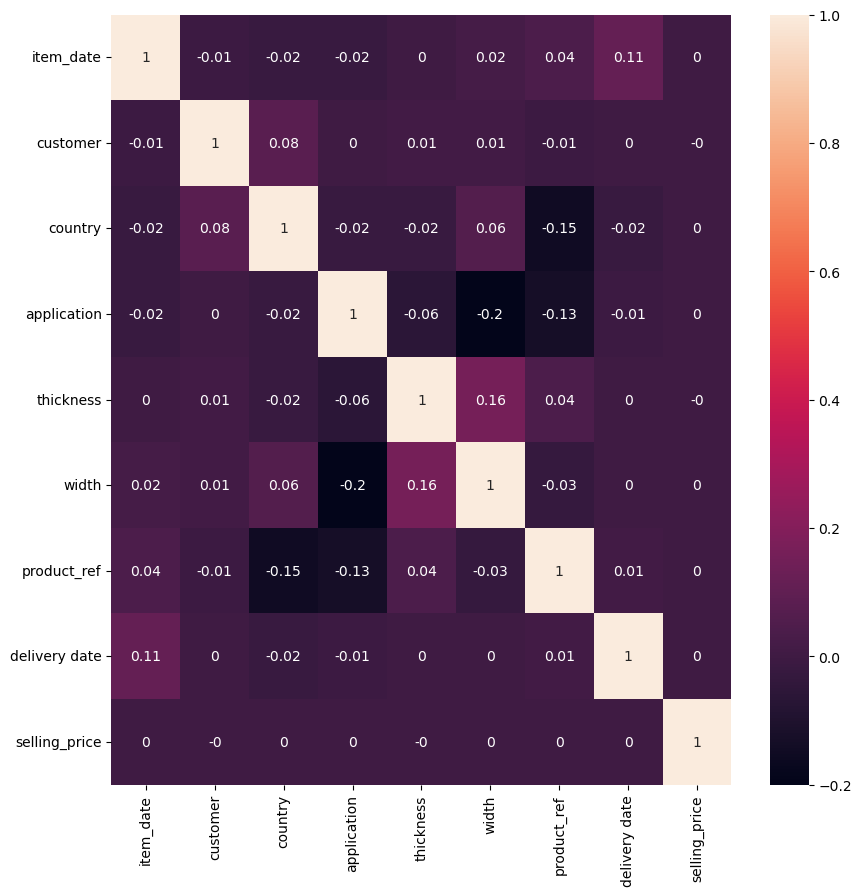

In [9]:
corr_mat = df.corr().round(2)
plt.subplots(figsize=(10,10))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

- *Not much correlation between independent features except between 'thickness' and 'width'*
- *We can also see that no correlation exists between independent and target variables*

## Dataset shape and checking the null,unique values in each column

In [10]:
df.shape

(181673, 14)

### Reducing the length of characters in 'item_date' and 'delivery date' columns by removing the year

In [11]:
df['delivery date']=df['delivery date'].apply(lambda x:str(x)[4:])
df['item_date']=df['item_date'].apply(lambda x:str(x)[4:])

df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,0401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,0701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,0401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,0401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,0401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,0101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,0401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,0101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,0401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,0301.0,577.00


### Dropping the rows which have space character in 'delivery date' and 'item_date' columns

In [12]:
df[df['delivery date']=='']

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104761,B9C4BAAE-25C3-468F-B315-63D57FA31C15,1112.0,100.229137,30349338.0,26.0,Won,S,10.0,1.0,1300.0,NaN,611993,,1005.0


In [13]:
df[df['item_date']=='']

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104640,1BA92915-36FC-437A-811C-9DC7BF958EA6,,51.785585,30230331.0,80.0,Lost,S,10.0,0.9,1435.0,NaN,628377,0101.0,654.0


In [14]:
df.drop(104761,inplace=True)
df.drop(104640,inplace=True)

### Converting the datatype of 'delivery date' and 'item_date' columns to 'float'

In [15]:
df['delivery date']=df['delivery date'].apply(lambda x:float(x))
df['item_date']=df['item_date'].apply(lambda x:float(x))

## Checking for 'null_count','unique_values','percent_of_null_values' in the dataset

In [16]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()})


,dtypes,null_count,unique_values,percent_of_null_values
id,object,2,181669,0.000011
item_date,float64,0,252,0.000000
quantity tons,object,0,181671,0.000000
customer,float64,1,1169,0.000006
country,float64,28,17,0.000154
status,object,2,9,0.000011
item type,object,0,7,0.000000
application,float64,24,30,0.000132
thickness,float64,1,594,0.000006
width,float64,0,1386,0.000000


**'material_ref ' column contains 55% of missing values,other columns contain less than 1% of missing data**



### Im dropping all rows which has less than 1% missing data in its respective columns

In [17]:
df.dropna(subset=['item_date','customer', 'country', 'status',
       'application', 'thickness',
       'delivery date','selling_price'],inplace=True)

In [18]:
df.shape

(181638, 14)

## Checking for 'null_count','unique_values','percent_of_null_values' after dropping null values in the dataset

In [19]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
id,object,2,181636,0.000011
item_date,float64,0,252,0.000000
quantity tons,object,0,181638,0.000000
customer,float64,0,1167,0.000000
country,float64,0,17,0.000000
status,object,0,9,0.000000
item type,object,0,7,0.000000
application,float64,0,30,0.000000
thickness,float64,0,594,0.000000
width,float64,0,1386,0.000000


*Since 'material_ref' column has 55% missing data I'll impute missing values later in the notebook*

### Finding mixed datatypes  in column(2) i.e 'quantity ton'

In [20]:
o=list(df['quantity tons']) #this column contains values which has mixed datatypes('float','string')

x=[]                        #to store original float values,and original string values 
                            #typecasted to float

z=[]                        #to store the index of the 'odd' value in the column
z1=[]                       #to store the 'odd' value in the column
for i in o:
    try:
        if i==float(i):
            x.append(i)
        else:
            x.append(float(i))
    except ValueError:
        z1.append(i)
        z.append(o.index(i))
print('Length of the dataset after finding the unrequired value: ',len(x))
print('Unrequired value: ',z1)
df.iloc[z]

Length of the dataset after finding the unrequired value:  181637
Unrequired value:  ['e']


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
173086,3C0A018F-4A85-4D96-A1AA-72BF0F7DC6DD,714.0,e,30157111.0,78.0,Won,W,41.0,0.5,1000.0,NaN,164141591,801.0,672.0


In [21]:
# Dropping row 173086

df.drop(173086,inplace=True)
df.shape

(181637, 14)

In [22]:
# Converting the 'quantity tons' column datatype from object to 'float'

df["quantity tons"] = df["quantity tons"].apply(lambda x: float(x))

In [23]:
df["quantity tons"].dtype

dtype('float64')

### Checking outliers in numerical variables

In [24]:
#from sklearn.model_selection import train_test_split
def plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

   # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

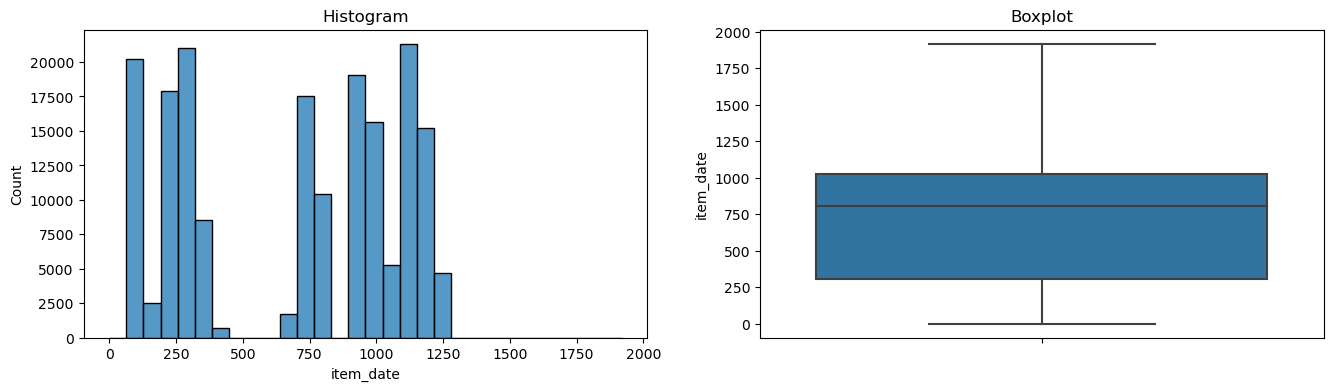

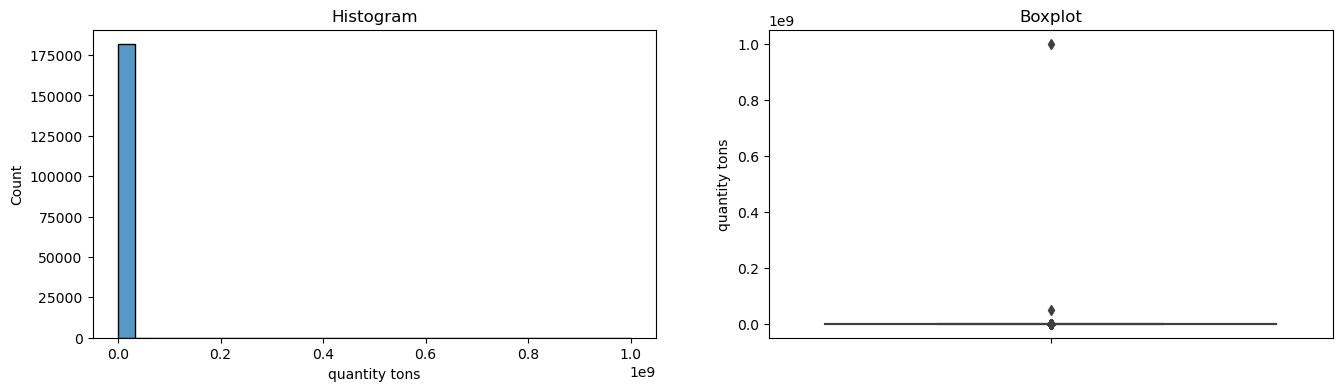

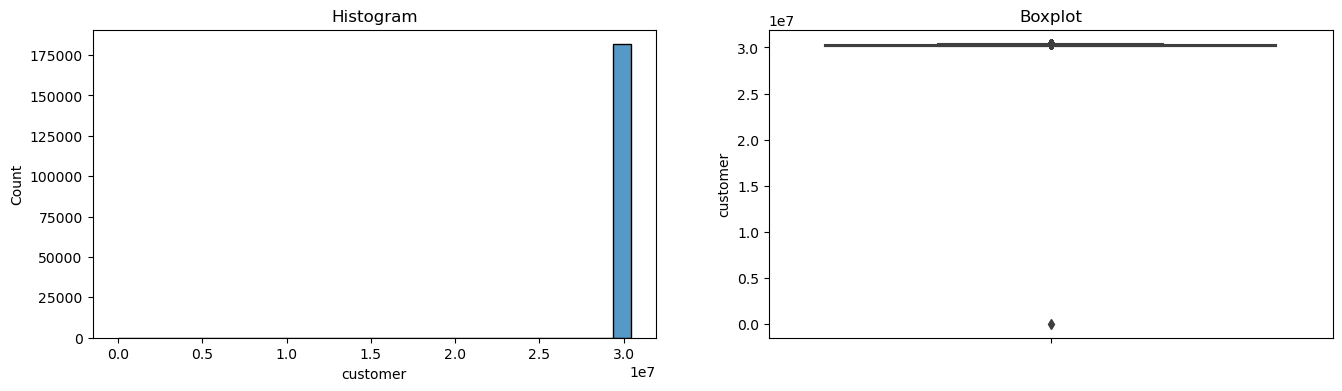

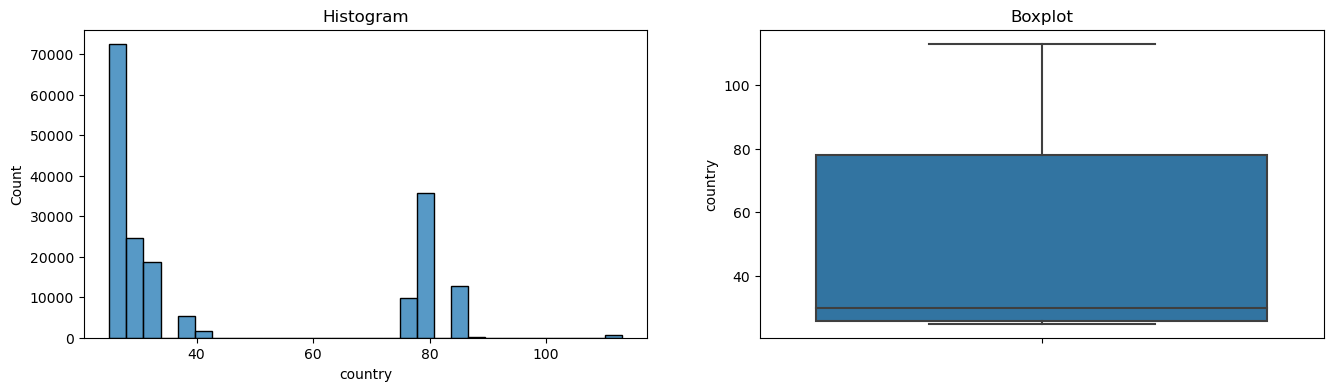

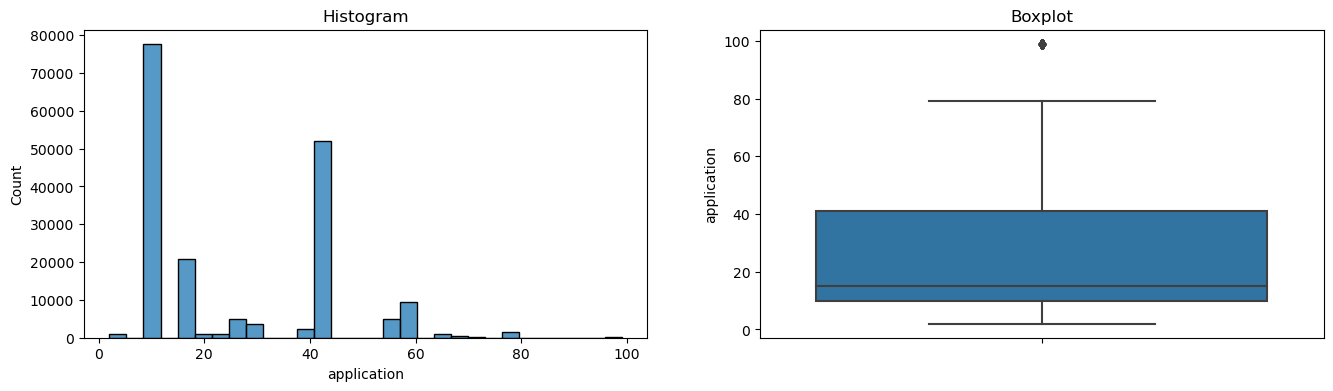

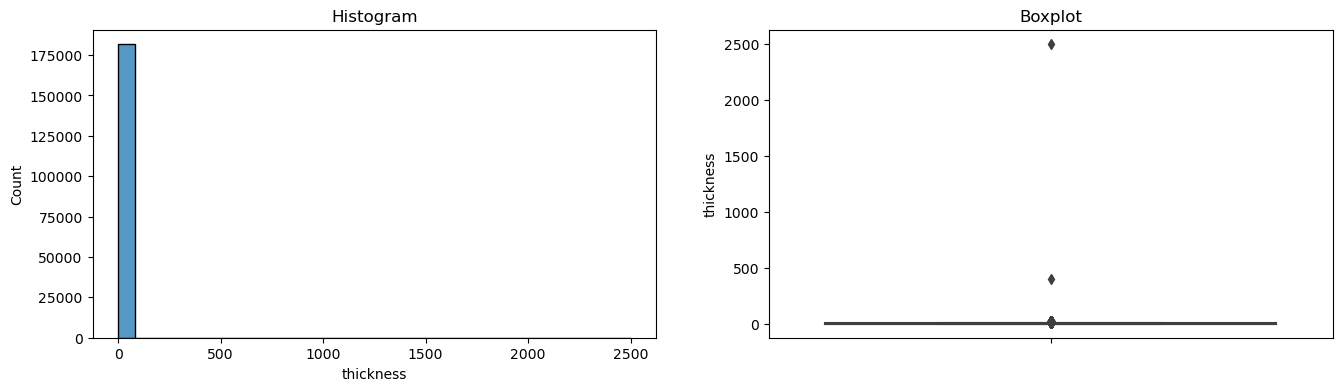

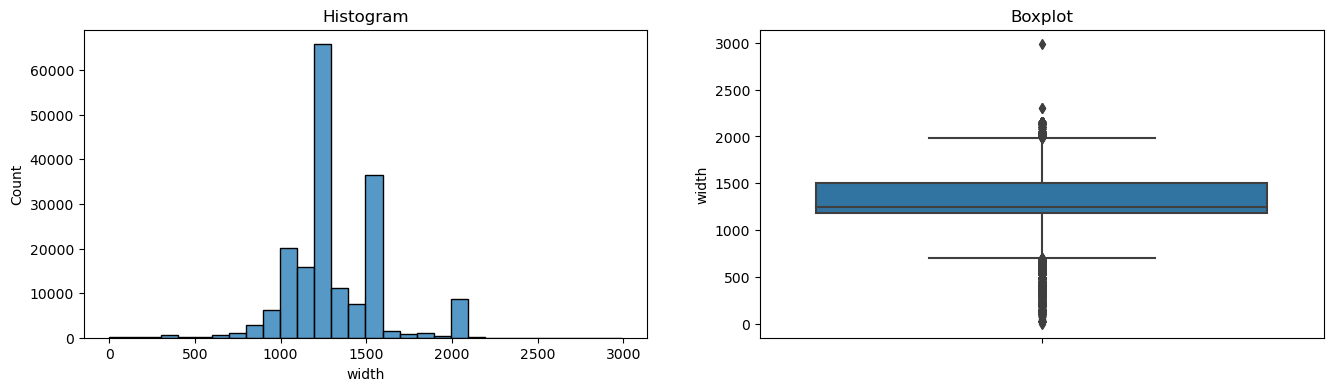

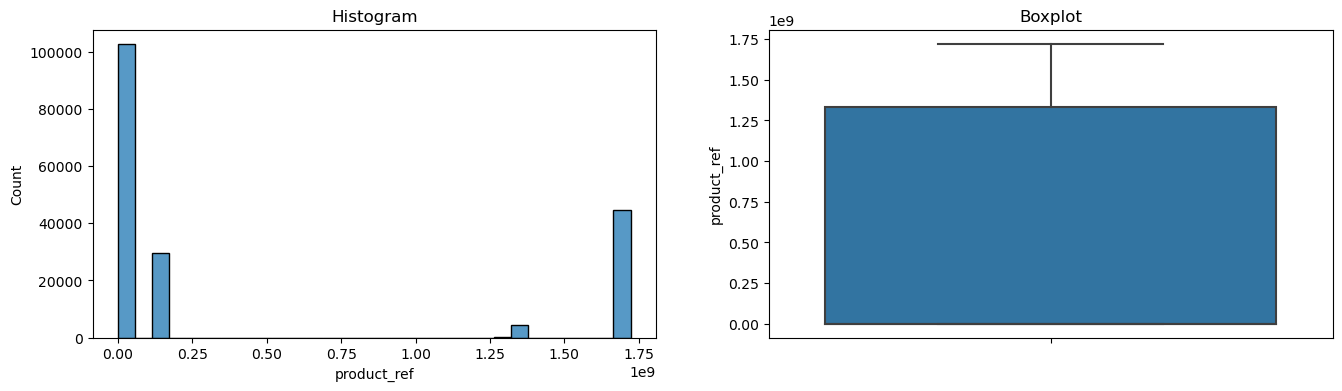

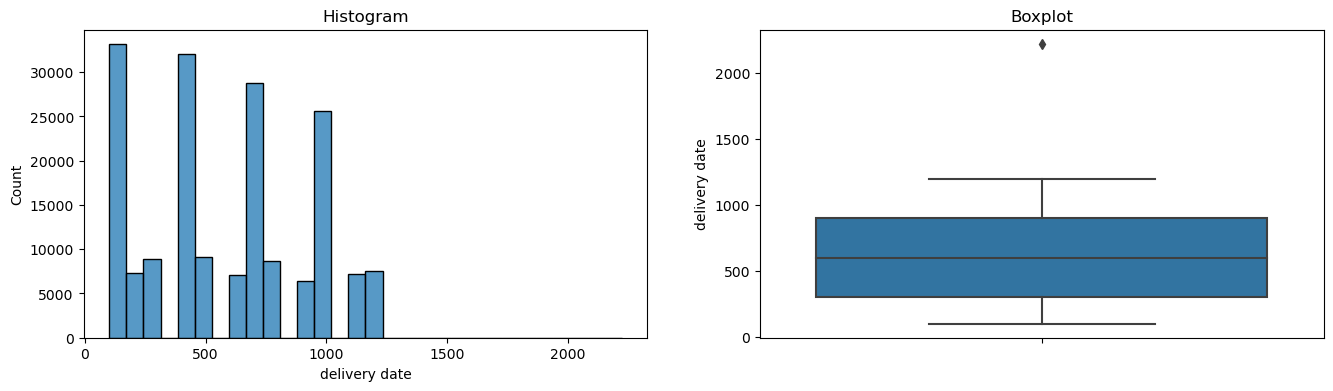

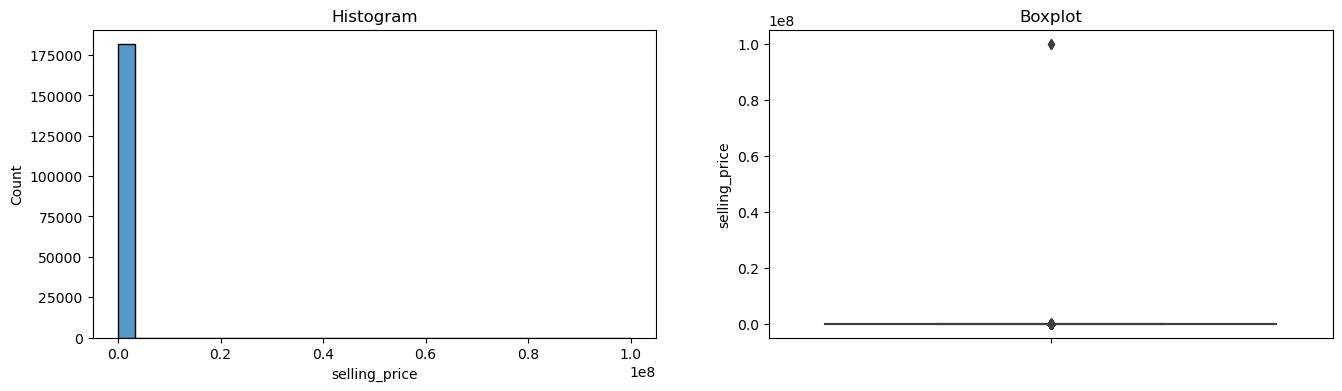

In [25]:
for j in ['item_date', 'quantity tons', 'customer', 'country', 
        'application', 'thickness', 'width',
       'product_ref', 'delivery date', 'selling_price']:
    plots(df,j)

*Among these variables only 'country' and 
      'product_ref does'nt have any outliers*

### Finding the upper and lower limit to replace outliers

In [26]:
def find_skewed_boundaries(df, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions


    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [27]:
item_date_upper_limit, item_date_lower_limit = find_skewed_boundaries(df, 'item_date', 1.5)
item_date_upper_limit, item_date_lower_limit

(2109.0, -779.0)

In [28]:
quantity_tons_upper_limit, quantity_tons_lower_limit = find_skewed_boundaries(df, 'quantity tons', 1.5)
quantity_tons_upper_limit, quantity_tons_lower_limit

(151.45063900000002, -73.32051996000001)

In [29]:
customer_upper_limit, customer_lower_limit = find_skewed_boundaries(df, 'customer', 1.5)
customer_upper_limit, customer_lower_limit

(30405714.0, 30071586.0)

In [30]:
application_upper_limit, application_lower_limit = find_skewed_boundaries(df, 'application', 1.5)
application_upper_limit, application_lower_limit

(87.5, -36.5)

In [31]:
thickness_upper_limit, thickness_lower_limit = find_skewed_boundaries(df, 'thickness', 1.5)
thickness_upper_limit, thickness_lower_limit

(6.449999999999999, -2.75)

In [32]:
width_upper_limit, width_lower_limit = find_skewed_boundaries(df, 'width', 1.5)
width_upper_limit, width_lower_limit

(1980.0, 700.0)

In [33]:
delivery_date_upper_limit, delivery_date_lower_limit = find_skewed_boundaries(df, 'delivery date', 1.5)
delivery_date_upper_limit, delivery_date_lower_limit

(1801.0, -599.0)

In [34]:
selling_price_upper_limit, selling_price_lower_limit = find_skewed_boundaries(df, 'selling_price', 1.5)
selling_price_upper_limit, selling_price_lower_limit

(1379.0, 243.0)

### Replacing outliers with upper and lower limits

In [35]:
def replace_outlier(dataset,variable,upper_limit,lower_limit):
    dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,
                       np.where(dataset[variable] < lower_limit, lower_limit, dataset[variable]))

In [36]:
replace_outlier(df,'item_date',item_date_upper_limit, item_date_lower_limit)
replace_outlier(df,'quantity tons',quantity_tons_upper_limit, quantity_tons_lower_limit)
replace_outlier(df,'customer',customer_upper_limit, customer_lower_limit)
replace_outlier(df,'application',application_upper_limit, application_lower_limit)
replace_outlier(df,'thickness',thickness_upper_limit, thickness_lower_limit)
replace_outlier(df,'width',width_upper_limit, width_lower_limit)
replace_outlier(df,'delivery date',delivery_date_upper_limit, delivery_date_lower_limit)
replace_outlier(df,'selling_price',selling_price_upper_limit, selling_price_lower_limit)

### Checking for outlier's after replacing the outliers with upper and lower limit values

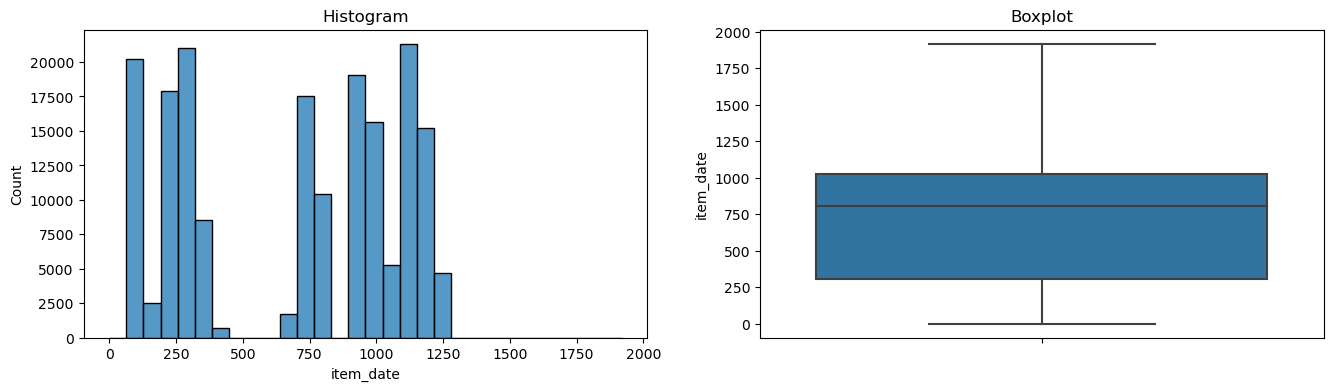

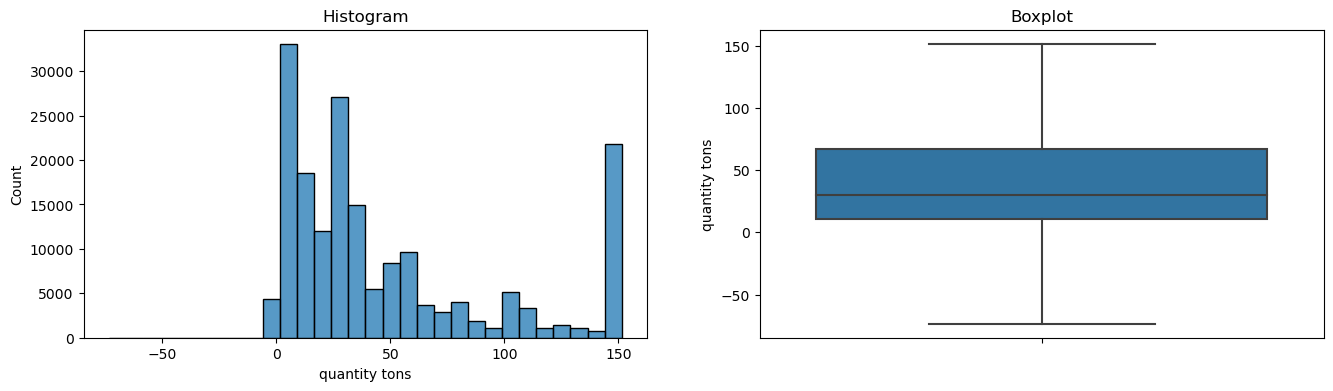

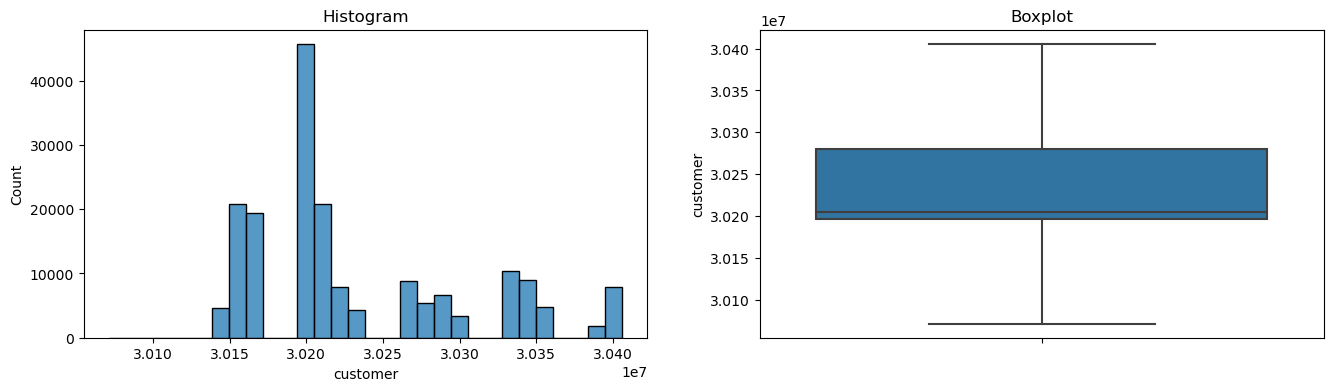

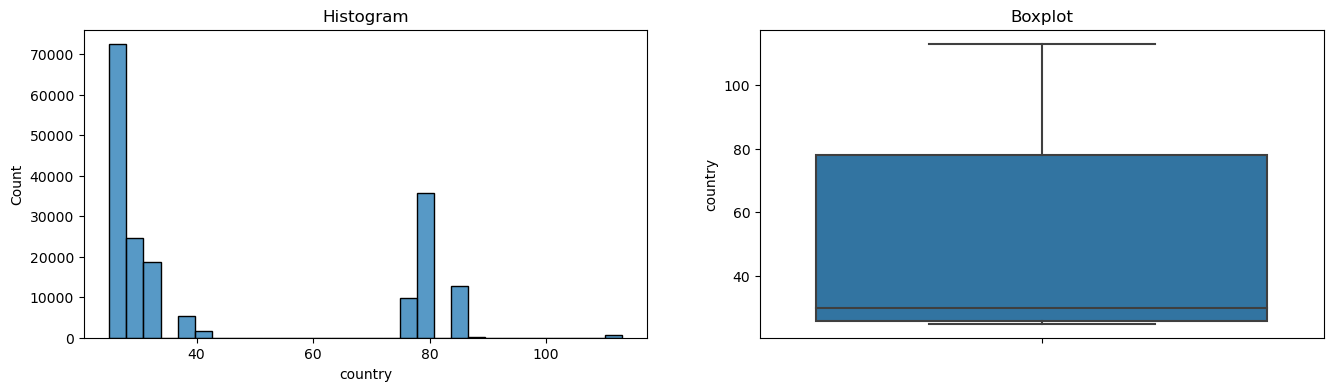

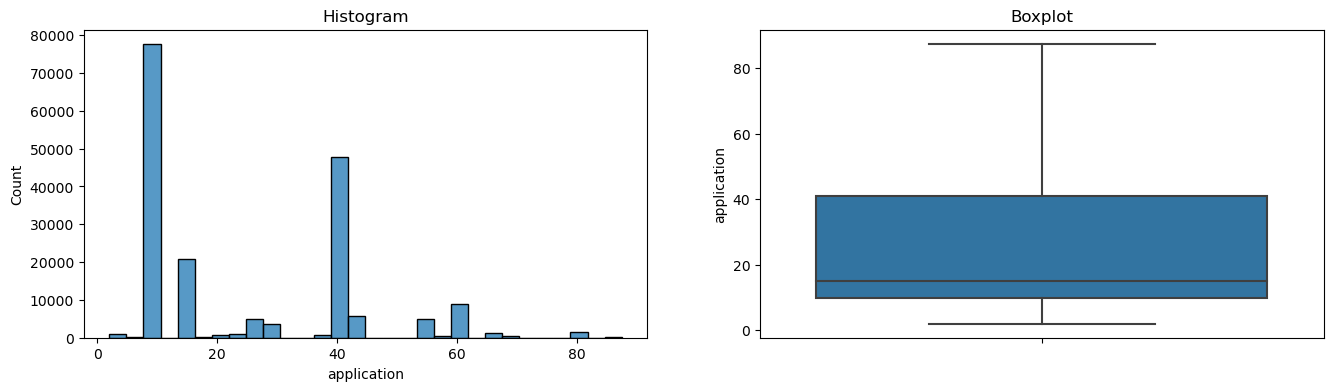

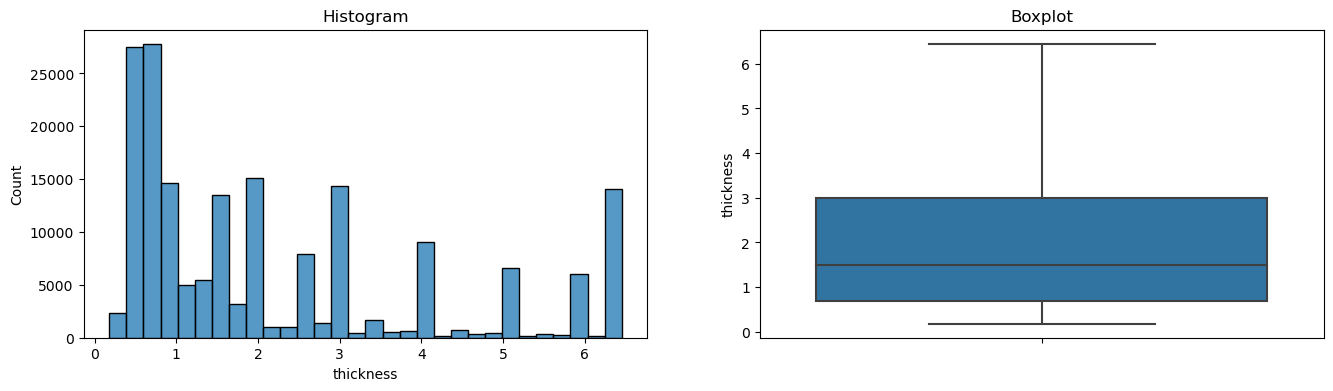

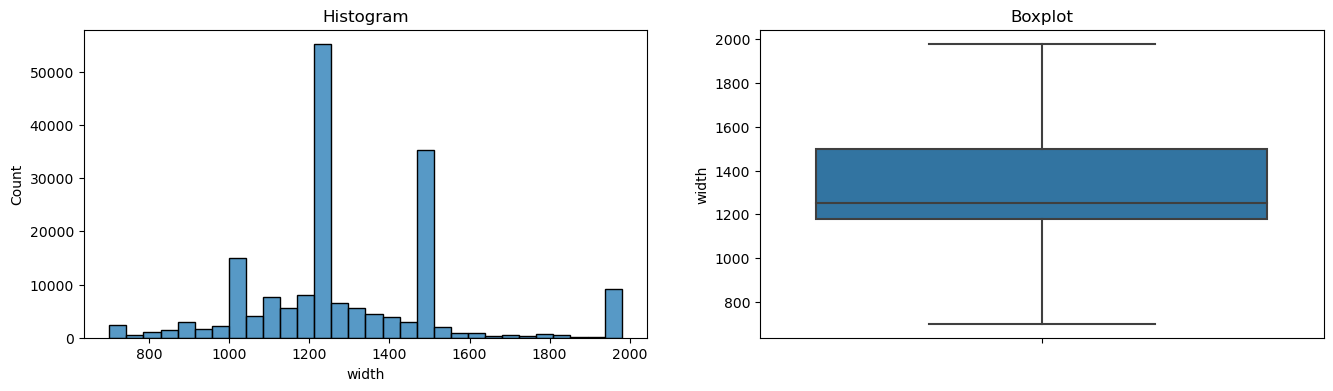

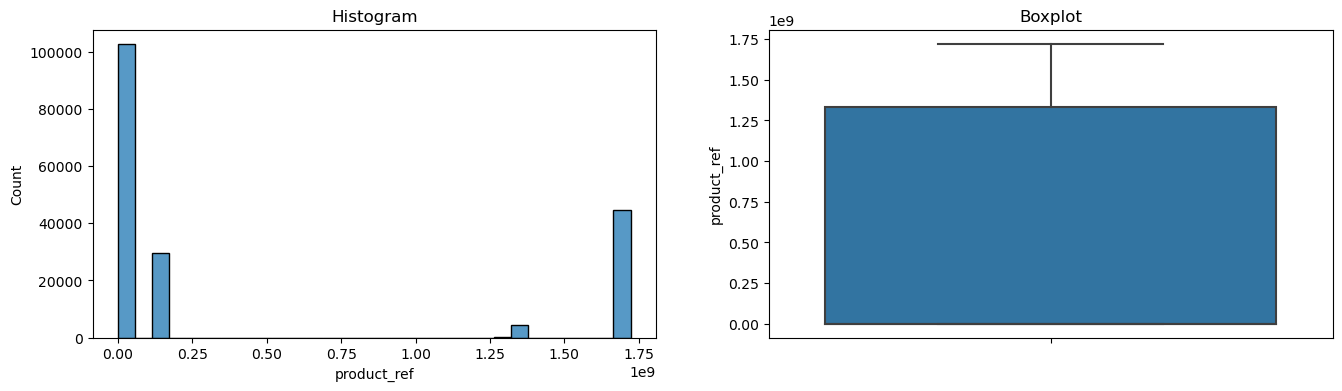

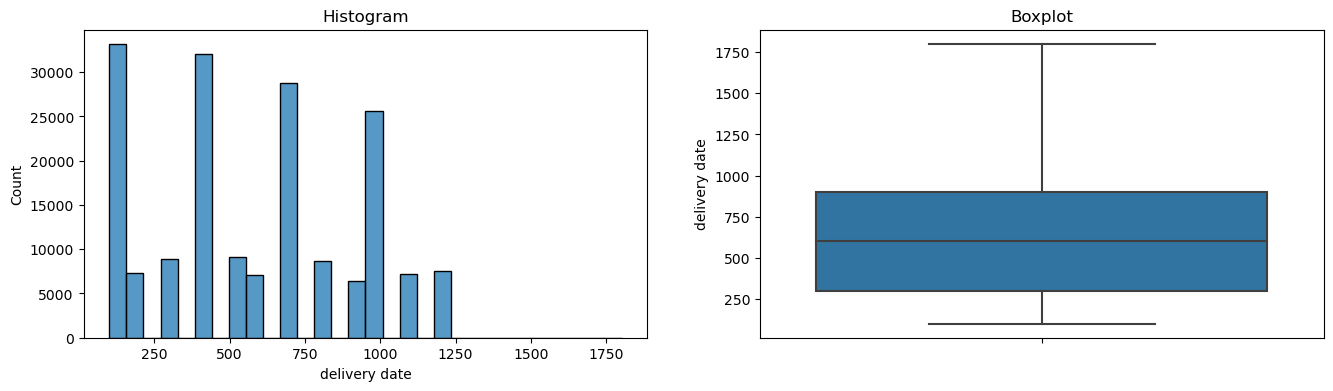

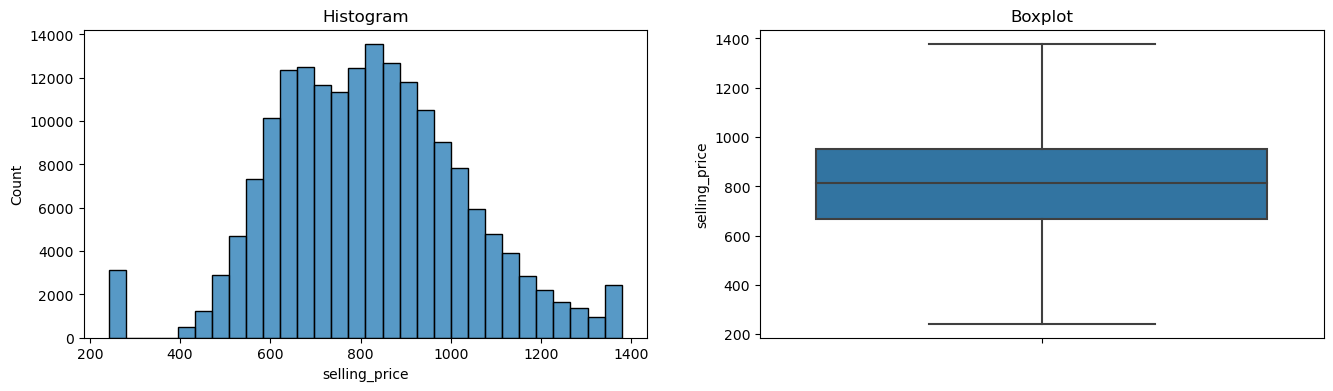

In [37]:
for j in ['item_date', 'quantity tons', 'customer', 'country', 
        'application', 'thickness', 'width',
       'product_ref', 'delivery date', 'selling_price']:
    plots(df,j)

*Outliers are replaced with the upper and lower limits of their respective columns
-->outliers are corrected but there is a change in distribution*

In [38]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,401.0,151.450639,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,401.0,151.450639,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,401.0,151.450639,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,401.0,151.450639,30211560.0,28.0,Won,W,10.0,4.00,1980.0,2_S275JR+AR-CL1,640665,301.0,577.00


## Splitting the dataset

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.iloc[:, 1:-1] #taking all independent variables except 'id' and 'selling_price'
y = df.iloc[:, -1]   #target variable 'selling_price'


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2023,
)

X_train.shape, X_test.shape

((145309, 12), (36328, 12))

## Missing data imputation for 'material_ref' column

In [42]:
# Getting a list of all the unique values from the country column 

m=list(X_train['country'].unique())
print(m)

[78.0, 27.0, 32.0, 26.0, 84.0, 25.0, 79.0, 28.0, 39.0, 77.0, 30.0, 40.0, 113.0, 38.0, 80.0, 89.0, 107.0]


In [43]:
# Grouping the dataset based on country and  finding the most frequent 'material_ref' value 

t=[]    # List of unique countries 
t1=[]   # List of the most frequent 'material_ref' value corresponding to each country

for country in m:
    p=X_train[(X_train['country']== country)][X_train.columns]
    p1=p['material_ref'].mode()
    t.append(country)
    
    try:
        t1.append(p1.iloc[0])
    
    except IndexError: # Country=89.0 has NaN values on all its 'material_ref' column 
        t1.append('missing')
    
    #print('country no.: ',country,'\n','frequently occurring material_ref: ',p1,'\n')
print(t)
print(t1)

[78.0, 27.0, 32.0, 26.0, 84.0, 25.0, 79.0, 28.0, 39.0, 77.0, 30.0, 40.0, 113.0, 38.0, 80.0, 89.0, 107.0]
['G9010', 'DC01', 'S235JR+AR LARG SUP 1500 CVLT', 'PI_S235JR-CL1', 'DC01', 'HC220CA', 'A2_BQ_SB', 'NEQ1 S355J2+N', 'HC220CA', 'CONSIGNMENT STOCK', 'S220GD+Z275 MAC_GALV EDGES', '-', 'S220GD+Z', 'S235JR+AR-CL1', 'U70199U', 'missing', 'BP001382']


- *What I've done here is that,for country 27.0-'DC01' is the most frequently used 'material ref',I will impute all NaN values in 'material_ref' column grouped by country 27.0 with 'DC01'*
- *This strategy is applied for all the other countries too*
- *A quick note:country **89.0** has **NaN** values on all of its rows,so the most frequent 'material ref' is **NaN**,so for this particular country,I've replaced NaN as 'missing'.*

**Demo Below:**

In [44]:
(X_train.loc[(X_train['country']==89.0),:])

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date
93760,1126.0,17.313921,30218453.0,89.0,Lost,W,15.0,2.99,1000.0,NaN,628377,401.0
153953,826.0,53.114396,30218743.0,89.0,Lost,S,15.0,1.18,1250.0,NaN,1668701376,1101.0
93704,1126.0,23.625623,30218453.0,89.0,Lost,W,15.0,2.00,1250.0,NaN,628377,401.0
93740,1126.0,20.841520,30218453.0,89.0,Lost,W,15.0,2.50,1500.0,NaN,628377,401.0
124709,1013.0,79.948627,30218452.0,89.0,Not lost for AM,S,10.0,1.20,1360.0,NaN,164141591,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120030,1020.0,30.321289,30157211.0,89.0,Lost,S,10.0,3.00,1250.0,NaN,1670798778,101.0
153949,826.0,25.356944,30218743.0,89.0,Lost,S,15.0,0.50,1250.0,NaN,1668701376,1101.0
160647,806.0,14.480715,30157211.0,89.0,Lost,S,10.0,2.00,1370.0,NaN,1670798778,901.0
157446,818.0,72.769724,30218453.0,89.0,Won,S,15.0,0.70,1250.0,NaN,628377,701.0


In [45]:
# Filling missing values in train_set
for h in range(len(t)):
    X_train.loc[(X_train['country']==t[h]) & (X_train['material_ref'].isnull()),['material_ref']]=t1[h]

In [46]:
# Filling missing values in test_set
for h in range(len(t)):
    X_test.loc[(X_test['country']==t[h]) & (X_test['material_ref'].isnull()),['material_ref']]=t1[h]

In [47]:
(X_train.loc[(X_train['country']==89.0),:])

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date
93760,1126.0,17.313921,30218453.0,89.0,Lost,W,15.0,2.99,1000.0,missing,628377,401.0
153953,826.0,53.114396,30218743.0,89.0,Lost,S,15.0,1.18,1250.0,missing,1668701376,1101.0
93704,1126.0,23.625623,30218453.0,89.0,Lost,W,15.0,2.00,1250.0,missing,628377,401.0
93740,1126.0,20.841520,30218453.0,89.0,Lost,W,15.0,2.50,1500.0,missing,628377,401.0
124709,1013.0,79.948627,30218452.0,89.0,Not lost for AM,S,10.0,1.20,1360.0,missing,164141591,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120030,1020.0,30.321289,30157211.0,89.0,Lost,S,10.0,3.00,1250.0,missing,1670798778,101.0
153949,826.0,25.356944,30218743.0,89.0,Lost,S,15.0,0.50,1250.0,missing,1668701376,1101.0
160647,806.0,14.480715,30157211.0,89.0,Lost,S,10.0,2.00,1370.0,missing,1670798778,901.0
157446,818.0,72.769724,30218453.0,89.0,Won,S,15.0,0.70,1250.0,missing,628377,701.0


- Now we can see that the NaN values are replaced as 'missing' for country 89.0

In [48]:
X_train.shape,X_test.shape

((145309, 12), (36328, 12))

In [49]:
y_train.shape,y_test.shape

((145309,), (36328,))

## Features selected for mean and ordinal encoding

In [50]:
features_mean_enc=['item_date','customer','application',
              'thickness','width','material_ref','product_ref','delivery date']

features_ordinal_enc=['status']

# ref CopperModelling_2.ipynb

## Important features selected using SHAP

In [51]:
features=['item_date','quantity tons','customer','country','status','item type','application',
              'thickness','width','material_ref','product_ref','delivery date']

imp_features=[features[0],features[2],features[4],features[6],features[7],features[8],features[9],features[10],features[11]]
least_imp_features=[features[1],features[3]]


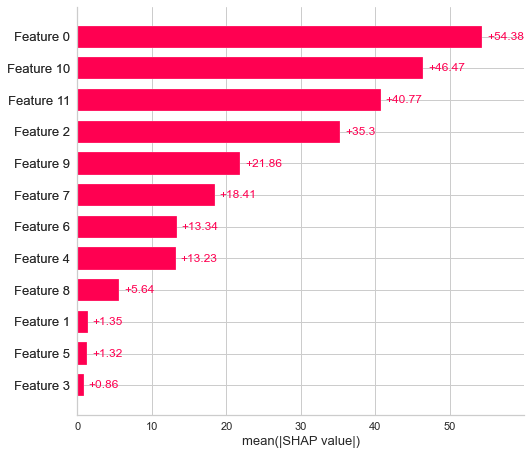

In [52]:
from IPython.display import display
from IPython.display import Image

display(Image(url='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAhMAAAHHCAYAAAAF5NqAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAABiFElEQVR4nO3de1xVZdr/8Q+okKFpKJGAaSfNUQmFoXQmSKHGE5lOSVEmJo35hEniqRopQ5tqNEvQaQwtecaHBB/1+dko5Vg6jZtUICFniDHMkiBkigiI896/P3ZtJUC3LHCjfd+v13651r1O17rkcLHWve7lZLFYLIiIiIi0kbOjAxAREZGLm4oJERERMUTFhIiIiBiiYkJEREQMUTEhIiIihqiYOE8Wi4Xa2lr0EIyIiIiVionzVFdXx9GjR6mrq3N0KBeFf/7zn44O4aKgPNlPubKP8mQ/5co4FRPSoWpqahwdwkVBebKfcmUf5cl+ypVxKiZERETEEBUTIiIiYoiKCRERETFExYSIiIgYomJCREREDFExISIiIoaomBARERFDVEyIiIiIISomRERExBAVEyIiImKIigkRERExRMWEiIiIGKJiQkRERAxRMSEiIiKGqJgQERERQ1RMiIiIiCEqJqRDdevWzdEhXBSUJ/spV/ZRnuynXBnnZLFYLI4O4mJSW1vL0aNHGfa7zbiWVjo6HBERuZh5u0PGC46OwrCujg7golVcBsXljo5CRETE4XSbQ0RERAxRMSEiIiKGqJgQERERQzptMZGXl+foEERERMQOhjpgBgYGUlVVhZOTU5P2RYsW8dBDD7V5vykpKSQlJbF3714j4dklKSmJ119/naqqKm688UbWrFlD//79O/y4IiIibRb7BqRlgHsP6/xgL9iyoOk6U18EL3dIfKT59uVVMGstfPIlmC0w43ZYPNW67F8n4Xd/gsoacHKCFx6E34w4aziGn+aIi4sjPDzc6G6aKCsr40I8sXrw4EHWrFnDq6++yi9/+UvmzZtHbGwsqampHX5sERGRNjPlw1vzYfRNLS9/aTt8kAfhv2p5+dIU8OkDWxdBVQ0MnQdBQ2HUYPiv9fBwiPXz0XG4PQ6+3gRdu7QaTofe5jh06BDjx4/H19eXoKAg0tLSbMtMJhOTJk3C39+foUOHEhYWxsmTJ9m/fz+JiYkUFRUxcuRIwHoFZMuWLbZt582bR2RkJACRkZFEREQQGBhIUFAQjY2NpKenExISgq+vL6Ghoezbt6/F+LZs2YKfnx9jxoyhR48erFixgtzcXL788ssOy4mIiMh5c5p6erq2Hj76DF7aAcNj4LcvwRelp5fvOwrpH8Gjd7a+v1dnwcpI63RxmXWfvS63zjeaoeyHcZQqquGycw/q1WHFRFlZGXPmzCEkJITMzEyWLFnC8uXLyc3NBSA2NpagoCAOHz7M3r17qa6uJiEhgeDgYKKjo/Hy8iI7O9uuY+Xn55Oamsr27ds5fvw4CxcuZNasWWRmZjJ9+nRiYmIoKSlptt3nn3/OddddZ5u/+uqrueyyy/j444/bJwkiIiLtregbGDsclt8Puavh1kEw+QWwWKzL5m2AzTHQ5Sy/4p2crFcaHnwFhsXA7cOst0oA1j4Cf9gGPlEQugz+NPusVyWgHYqJ+Ph4fH19bZ8ZM2YAsG3bNnr06MGCBQtwcXFhwoQJjBgxguTkZAA2bNhAbGwsFRUVnDhxgp49e1JaWnq2Q7VqyJAhDBw4kD59+rB582YGDRpEREQELi4uzJgxAy8vL1JSUpptV1tbS/fu3Zu0devWjaqqqjbFISIi0m7e+Qj85ls/cHr630Ww6/cwbIC1KFgwGQq+gk+L4f6XYfXD0M/dvmP8JQb+8yZ8UwnPpUFNHYSvgjfnQmES/D0eZr8GJ/9z1t0Y7jOxdOnSFvtMFBYWcurUKXx9fW1tZrPZduvCZDIRFRVFbW0t3t7eVFVV0atXrzbF4O5+OmnFxcXk5eU1O25RUVGz7VxdXampqWnSVl9fT8+ePdsUh4iIyPnKzc2lvr6++YK+wIYHAPAPWEHWD9PdjxXT/bkcvpk43LqexYJfYyOf7j/ItfknaZizFoBuX1dBo4XywiI+Xzqpya6vyCig+oarqPew/r7rM8qH3u9lU3yDG9d9W8HRfk6QlQXdYNA1vTn1P+lcv/jBVs+hw4bT9vT0ZMCAAaSnp9vaCgoKcHNzo6CggFWrVrFu3TrGjBkDwMyZM1vtdOns7ExdXZ1tvry86TDWZz5N4uHhQUBAgO0KCFgfM/X09Gy23wEDBnDixAnbfHFxMdXV1U0KERERkY5k7+8cf39/64Tr5zAnhWunj4drPWHdbvC7lsFRUyBqCi4/bvDsW/CfCvomPkLfn+5s3Yfw8dfw2qNQ1wBLd8OU2+gdNhbmbsG/1s3aubPgKzj5LT3vCT1rbB3WZ2LKlCmUlJSQlJREfX092dnZhIeHk5aWRkVFBQBubm6YzWa2bt1KZmYmDQ0NALi4uFBTU4PZbAashcnu3buprKzEZDJx5MiRVo8bHh5OTk4OO3fuxGw2s2fPHqZNm8aBAwearXvPPfeQlZXFu+++S1VVFUuXLuUXv/gFV199dfsnREREpK0s205PDxsACVEQ9jwMmQvbD0LK/HPvIy7F+gFYFQnl31s7cPovAP/rYN5E6O0G2xdb+10Mj4F7/gjr58D1Z/+9aOitoYGBgcTGxrb6aOiBAweIj4+nqKgIFxcXxo0bx/LlywF4+umn2bVrF2azGU9PT4YMGUJubi7vv/8+J06cICIigsrKSjIyMsjJySEuLo6SkhJ8fHwYNGgQ5eXlvPnmm0RGRtKrVy9effVV23F37NjBmjVrKC0txc3Njfvvv5958+a1GOMbb7zB66+/TkVFBTfccAOJiYl4e3u3es62t4aGJeKqF32JiIgR/fvCF+sdHYVhegX5eVIxISIi7eYSKSY67XDaIiIicnFQMSEiIiKGqJgQERERQ1RMiIiIiCEqJkRERMSQDhu06pLX70roeu6Xn4iIiLTK285hrzs5FRNtZfoDuLo6OopOLzc3VyOK2kF5sp9yZR/lyX7KlXG6zSEdqsXx5qUZ5cl+ypV9lCf7KVfGqZgQERERQ1RMiIiIiCEqJkRERMQQFRMiIiJiiIoJERERMUTFhIiIiBiiYkI6VLduGtjLHsqT/ZQr+yhPciFp0Kq2Gv0klFY6OopOT8PA2Ed5sp9yZZ+LOk/e7pDxgqOjkPOgYqKtisuguNzRUYiIiDicbnOIiIiIISomRERExBAVEyIiImKIigkRERExxKHFRF5eniMPLyIil6IdB6FnRNO2dbthZCwMmQsPvgK153hT6NQXIfp16/S/ToLf/NOf4THgNBW2fdgR0V+UzllMBAYGMnToUIYNG9bkk5ycbOjAKSkpREdHG9rH+Xr++ecJDw9v0mYymQgJCWHYsGHcfvvtvPfeexc0JhERaUfHimDBJrCc0bbtQ0jYBX97Fv75KlTXweqdre/jpe3wwRl/7P6iPxx5+fTnzpvh/ttg6q0ddRYXHbuuTMTFxXH06NEmn4ceesjQgcvKyrBYLOdesR2Ul5fzxBNPsGnTpibtVVVVPP7440ycOJGsrCzuueceFi5cSHV19QWJS0REDHCa2nT++1p48FV4ObJpe/I+iL0L3HuCszO8NhumB7e8z31HIf0jePTOlpd/8C/YmmHdh9gYvs1x6NAhxo8fj6+vL0FBQaSlpdmWmUwmJk2ahL+/P0OHDiUsLIyTJ0+yf/9+EhMTKSoqYuTIkYD1CsiWLVts286bN4/IyEgAIiMjiYiIIDAwkKCgIBobG0lPTyckJARfX19CQ0PZt29fqzE++OCDFBYWEhzc9Itn9+7dODk5MX/+fFxdXYmOjsbNza3JOYiIyEVi9msw+07wHdi0/d9FcKocxj0Hvk/As1ugt1vz7Yu+gXkbYHMMdGnl1+PCTbDiAbji8vaO/qJmqJgoKytjzpw5hISEkJmZyZIlS1i+fDm5ubkAxMbGEhQUxOHDh9m7dy/V1dUkJCQQHBxMdHQ0Xl5eZGdn23Ws/Px8UlNT2b59O8ePH2fhwoXMmjWLzMxMpk+fTkxMDCUlJS1um5CQQFpaGn369GnS/u9//xsvL68mbf369SM/P78N2RARkQ73zken+y7A6elX34auzvBwSPNt6hthTy6kLoDMl+CbSnh680/WaYD7X4bVD0M/95aPbfoESr+DiNva95wuAXaNgBkfH8+KFSts8yNGjGDTpk1s27aNHj16sGDBAgAmTJhAamoqycnJrFy5kg0bNjB48GAqKio4ceIEPXv2pLS0tE2BDhkyhIEDBwLW4mDQoEFERFg72MyYMYMtW7aQkpJCTExMs21/3O6nvv/+e1xcXJq0ubq66jaHiIiD5ebmUl/fQifJvsCGBwDwD1hB1g/TNz20EeeaBiyDH8Wp3sxl1bVUD36UT1+9j2uv6EZZgBelx6z9IK641Quv1//BJ1lZtt1+8pe/cl3+SRrmrAWg29dV0GihvLCIz5dOAsAn4V0aQwdR/NFHHXjmnZe/v3+ry+wqJpYuXdqs4yJAYWEhp06dwtf39CjwZrPZduvCZDIRFRVFbW0t3t7eVFVV0atXr/ONHwB399OVYnFxMXl5ec2OW1RUdF777N69O3V1dU3aamtrufxyXb4SEXGkM3++n43tF9w/z/hFd+IUDIvh8vzXrO8oOVZFz1QT1zw3Ey5zgdcOwu0327bNysrippmTYeZkbH9ePvsW/KeCvomP0PfHtrzNkPgIXv5DjJ/gJcbQuzk8PT0ZMGAA6enptraCggLc3NwoKChg1apVrFu3jjFjxgAwc+bMVjtdOjs7N/nFXl7e9L0XTk5OtmkPDw8CAgKaPFGSl5eHp6fnecU/ePBg/t//+39N2oqLi5k0adJ57UdERBzAss2+9f5rnPXWhv9CaDTDyOtgVaR1WVwK/YqL4fXW/+q2OVYMAz3aHO6lzFCfiSlTplBSUkJSUhL19fVkZ2cTHh5OWloaFRUVALi5uWE2m9m6dSuZmZk0NDQA4OLiQk1NDWazGbAWJrt376ayshKTycSRI0daPW54eDg5OTns3LkTs9nMnj17mDZtGgcOHDiv+CdOnEhjYyMvvfQStbW1JCYmUlFRwV133dW2hIiIiOMNvAoq/+f0fJcu8Ew4/GsN5CdCyvzTHSifu5/iR1t4suPZ+yDxkaZtVSng07f5umKsmPD09CQxMZGtW7fi7+/P7373O8aNG8fcuXPx8/Nj6tSpzJ49mxEjRrB+/XrGjh3Ll19+CUBoaCgAfn5+VFVVsXjxYk6dOsWoUaOIj49v9uTFmYYPH86yZctYvXo1N998M0uXLiUqKoqwsLDzir979+6sXbuWv/3tbwQEBLB161ZWrVrV5lsxIiIiP0dOlgs12MMlora2lqNHjzIsLBFXvYJcRKT99e8LX6y/YIfLyso6a+dCOTe9m0NEREQMUTEhIiIihqiYEBEREUNUTIiIiIghhsaZ+FnrdyV07eboKERELj3erQxnLZ2Wiom2Mv0BXF0dHUWnl5uba/dIdj9nypP9lCv7KE9yIek2h3SoFsfWl2aUJ/spV/ZRnuRCUjEhIiIihqiYEBEREUNUTIiIiIghKiZERETEEBUTIiIiYoiKCRERETFExYSIiIgYomJCOlS3bhol1B7Kk/2UK/soT3IhaQTMthr9JJRWOjqKTk/j79lHebKfcmWfFvPk7Q4ZL1zoUORnQMVEWxWXQXG5o6MQERFxON3mEBEREUNUTIiIiIghKiZERETEEBUTIiIiYojDO2Dm5eUxZMgQR4chIiJns+MgTH8VKv7HOt/YCLFvQvoRaGiEBZPh0d803+6el+DTr07Pf3YKgn8BL0yHiNWn2xvNcPQL+N9FMPXWjjwT6QB2FROBgYFUVVXh5OTUpH3RokU89NBDbT54SkoKSUlJ7N27t837OF/PP/88OTk5bNmypUn7vn37iI2NJSsr64LFIiJyUThWBAs2geWMtj+/C/8uhqOvQEU1jHoSRl4HgTc23XbrotPTh4/BPX+Etb+D/n3hyMunl8W+AcMHqJC4SNl9ZSIuLo7w8PB2PXhZWRkWi+XcK7aD8vJynn32WXbt2oWfn5+t3Ww2s27dOtavX4+zs+76iMjPnNNUsGw7Pf99LTz4KrwcCRGvnG7ffhB+dyd07QJX9oD7fgV/2d+8mPhRXT3MSIBXHrYWEmf64F+wNQM+fqXFTaXza5ffnocOHWL8+PH4+voSFBREWlqabZnJZGLSpEn4+/szdOhQwsLCOHnyJPv37ycxMZGioiJGjhwJWK+AnHnFYN68eURGRgIQGRlJREQEgYGBBAUF0djYSHp6OiEhIfj6+hIaGsq+fftajfHBBx+ksLCQ4ODgJu3PPPMMaWlp3Hvvve2RChGRS8vs12D2neA7sGn7ya+hf5/T8z59oPDr1vezYS94ucOUFq48LNwEKx6AKy5vl5DlwjNcTJSVlTFnzhxCQkLIzMxkyZIlLF++nNzcXABiY2MJCgri8OHD7N27l+rqahISEggODiY6OhovLy+ys7PtOlZ+fj6pqals376d48ePs3DhQmbNmkVmZibTp08nJiaGkpKSFrdNSEggLS2NPn36NGmPiori/fffx9/f31giREQuVu98BH7zrR84Pf3q29DVGR4Oab6N2Qxn3vq2AF3O8itl9U74/T3N202fQOl3EHGboVMQx7L7Nkd8fDwrVqywzY8YMYJNmzaxbds2evTowYIFCwCYMGECqampJCcns3LlSjZs2MDgwYOpqKjgxIkT9OzZk9LS0jYFO2TIEAYOHAhYi4NBgwYREREBwIwZM9iyZQspKSnExMQ02/bH7X5qwIABbYpFRORilJubS319fdPGvsCGBwDwD1hB1g/TNz20EeeaBiyDH8Wp3sxl1bVUD36UT1+9j4FXulL6wWG+7VoBQL/Mo3Tp1khhC/3Oun/yFdd/X83RHjXwk+U+Ce/SGDqI4o8+av+TPQ/qL3duZ/uj2+5iYunSpS32mSgsLOTUqVP4+p4eCd5sNttuXZhMJqKioqitrcXb25uqqip69ep1PvHbuLu726aLi4vJy8trdtyioqI27VtE5OfgzJ+ZrbH90vjnGb88TpyCYTFcnv+a9b0fx6q44t0ciLkPKmvg72/Ca4/i6T+0+Q4/2Anj/PEPCGi+LG8zJD6Cl7/jnurLysrS1WmDDD8a6unpyYABA0hPT7e1FRQU4ObmRkFBAatWrWLdunWMGTMGgJkzZ7ba6dLZ2Zm6ujrbfHl503dfnPk0iYeHBwEBASQnJ9va8vLy8PT0NHpKIiI/X2d2vjybOeOg4Cu4eT7UNcDsOyD4h0IiLsX673P3W/89VgwDr2p5P8eKYaCHsZjF4Qz3mZgyZQolJSUkJSVRX19PdnY24eHhpKWlUVFhvfzl5uaG2Wxm69atZGZm0tDQAICLiws1NTWYzWbAWpjs3r2byspKTCYTR44cafW44eHh5OTksHPnTsxmM3v27GHatGkcOHDA6CmJiMhPDbwKKv/n9HzXLvDKLPjnq3BsLSy4+/Sy5+4/XUiA9VHQ37fSyb0qBXz6trxMLhrtcmUiMTGR+Ph41qxZg4uLC+PGjWPu3LkATJ06ldmzZ2M2m/H09GTs2LG2zpmhoaFs3LgRPz8/MjIyWLx4MXFxcYwaNQofHx+Cg4ObXZ340fDhw1m2bBmrV6/mqaeews3NjaioKMLCwoyekoiIiJwHJ8uFGujhElFbW8vRo0cZFpaIq15BLiIXk/594Yv1jo6i01GfCeM0SpOIiIgYomJCREREDFExISIiIoaomBARERFDHP4K8otWvyuhazdHRyEiYj9v93OvI9IGKibayvQHcHV1dBSdXm5url0j7v3cKU/2U67sozzJhaTbHNKhmr0DQFqkPNlPubKP8iQXkooJERERMUTFhIiIiBiiYkJEREQMUTEhIiIihqiYEBEREUNUTIiIiIghKiZERETEEBUT0qG6ddMoofZQnuynXIl0PhoBs61GPwmllY6OotPT+Hv2UZ7s12lz5e0OGS84OgoRh1Ax0VbFZVBc7ugoREREHE63OURERMQQFRMiIiJiiIoJERERMaTTFhN5eXmODkFERETsYKgDZmBgIFVVVTg5OTVpX7RoEQ899FCb95uSkkJSUhJ79+41Ep5dXn31Vd566y0qKyu56qqrWLRoEb/5zW86/LgiIgAk7oI/vQNOwPVXw+tz4Kre1mV9Z4BPn9PrLpwMDwQ33b68CmathU++BLMFZtwOi6deoOBFrAw/zREXF0d4eHh7xGJTVlaGxWJp13225K9//Stvvvkma9eu5ZZbbmH9+vUsXLiQm2++mauvvrrDjy8iP3NZBbDy/yDnZejlBgvehKUp8Oc5kP8luPeAIy+ffR9LU6wFx9ZFUFUDQ+dB0FBwuSBnIAJ08G2OQ4cOMX78eHx9fQkKCiItLc22zGQyMWnSJPz9/Rk6dChhYWGcPHmS/fv3k5iYSFFRESNHjgSsV0C2bNli23bevHlERkYCEBkZSUREBIGBgQQFBdHY2Eh6ejohISH4+voSGhrKvn37Wozv5MmT3H333YwePZouXbowZ84cnJ2dOXLkSEelRER+7pzOuGrgfz0cW2stJGrq4MtvoE9P6zLTJ9DFGW57GnyfgOdSobGx+f5enQUrI63TxWVQWw+9Lu/w0xA5U4cVE2VlZcyZM4eQkBAyMzNZsmQJy5cvJzc3F4DY2FiCgoI4fPgwe/fupbq6moSEBIKDg4mOjsbLy4vs7Gy7jpWfn09qairbt2/n+PHjLFy4kFmzZpGZmcn06dOJiYmhpKSk2XaPPvoozzzzjG1+z5491NbWcvPNN7dPEkREzqVbV9hxEHwegb//C2aOtbY3mCHUF9KXwt+XwzsfQcKu5ts7OUHXLvDgKzAsBm4fBoO9LuQZiBgvJuLj4/H19bV9ZsyYAcC2bdvo0aMHCxYswMXFhQkTJjBixAiSk5MB2LBhA7GxsVRUVHDixAl69uxJaWlpm2IYMmQIAwcOpE+fPmzevJlBgwYRERGBi4sLM2bMwMvLi5SUlLPuIzs7m8WLFxMeHk6/fv3aFIeISIve+Qj85ls/cHr6nY+s83ffAv/ZBM+Gw2/iwWyGR+6AhEfA7TLo7Qbz74LtB1s/xl9i4D9vwjeV8Fxa6+uJdADDfSaWLl3aYp+JwsJCTp06ha/v6cFvzWaz7daFyWQiKiqK2tpavL29qaqqolevXm2Kwd3d3TZdXFxMXl5es+MWFRW1uv2OHTt45plnCAsL49lnn21TDCIiubm51NfXN1/QF9jwAAD+ASvI+mHa9eR/6LphB1V+/a3r3dybkZ+fIuf9A/Q6UED1oKuovtETgN6fFuBR8z3HsrKa7PqKjAKqb7iKeg/r7ZE+o3zo/V423HUjWT9ZV1qnXJ2bv79/q8s6bDhtT09PBgwYQHp6uq2toKAANzc3CgoKWLVqFevWrWPMmDEAzJw5s9VOl87OztTV1dnmy8ubDmN95tMkHh4eBAQE2K6AgPUxU09Pzxb3vXbtWl577TXmzZtHVFTU+Z+oiMgPzvwj5mxsP5S//xdEv2ztZNn3Ckh+H4Zdg1/IbfDuZ/BWLvzvQqhrgNgdEDW++Q/0dR/Cx1/Da49a11u6G6bc1vQ4clZZWVnKlUEd1mdiypQplJSUkJSURH19PdnZ2YSHh5OWlkZFRQUAbm5umM1mtm7dSmZmJg0NDQC4uLhQU1OD2WwGrIXJ7t27qaysxGQynbWDZHh4ODk5OezcuROz2cyePXuYNm0aBw4caLbuzp07WbduHStXrlQhISIXhmXb6enbfgFP3wO3L7Xe9njrAOxYYl32TLj1aY7hT4DvfBg9GKJCrcviUqwfgFWRUP49DI8B/wXgfx3Mm3ghz0gEJ4uBZzADAwOJjY1t9dHQAwcOEB8fT1FRES4uLowbN47ly5cD8PTTT7Nr1y7MZjOenp4MGTKE3Nxc3n//fU6cOEFERASVlZVkZGSQk5NDXFwcJSUl+Pj4MGjQIMrLy3nzzTeJjIykV69evPrqq7bj7tixgzVr1lBaWoqbmxv3338/8+bNaxZfWFgYx44do2vXphdoli1bxm9/+9sWz6m2tpajR48yLCwRV73oS0R+1L8vfLHe0VHY6K9t+ylXxhkqJn6OVEyISItUTFy0lCvjOu1w2iIiInJxUDEhIiIihqiYEBEREUNUTIiIiIghKiZERETEkA4btOqS1+9K6NrN0VGISGfh7X7udUQuUSom2sr0B3B1dXQUnV5ubq7dowL+nClP9lOuRDof3eaQDtXiewqkGeXJfsqVSOejYkJEREQMUTEhIiIihqiYEBEREUNUTIiIiIghKiZERETEEBUTIiIiYoiKCelQ3bppYC97KE8icjHToFVtNfpJKK10dBSdnoYWsk+b8uTtDhkvtHcoIiLnTcVEWxWXQXG5o6MQERFxON3mEBEREUNUTIiIiIghKiZERETEEBUTIiIiYkinLSby8vIcHYKIiIjYwVAxERgYyNChQxk2bFiTT3JysqGgUlJSiI6ONrQPe73wwgvccsst+Pr6Mm3aNE6ePHlBjiviMH/ZDzc/AX7zrY84Z37adPnJ/4B3FPznu5a3b2yEOX+GXzxu/Sx4EywW67JvKuCB1TAiFm6aC/+9rwNPREQ6C8OPhsbFxREeHt4esdiUlZVh+fGHUwd64403SElJ4eWXX+bXv/41zzzzDDNnzuRvf/tbhx9bxCHyv4SFmyB7JfRzh11ZMPUl+GK9dXny+/DMFij6pvV9/Pd+634+Xg1mi7Ug2ZoB946GyAQY4gObn4DC/8DwJ2DMMPDpe2HOT0QcokNvcxw6dIjx48fj6+tLUFAQaWlptmUmk4lJkybh7+/P0KFDCQsL4+TJk+zfv5/ExESKiooYOXIkYL0CsmXLFtu28+bNIzIyEoDIyEgiIiIIDAwkKCiIxsZG0tPTCQkJwdfXl9DQUPbt29difO+++y4hISGEhITg6urKihUrKCkp4dChQx2WE5ELzmnq6WnXbpD0X9ZCAiDgevjqW6irtxYQOw7BO3Fn31+jGapqobYBauuhrgEu62a9KrEnF5754Y8Ln75w8EVw79khpyUinUeHFRNlZWXMmTOHkJAQMjMzWbJkCcuXLyc3NxeA2NhYgoKCOHz4MHv37qW6upqEhASCg4OJjo7Gy8uL7Oxsu46Vn59Pamoq27dv5/jx4yxcuJBZs2aRmZnJ9OnTiYmJoaSkpNl2ZrOZ7t272+adnJxs+xO5JA28CiYGWKctFpj/JtwVAC7dwMsdti2GQV5n30fkGLjSzXorpN8suKEfhP0SPv0K+l0JL/8/+NWTELAQso/D5a4dfloi4liGb3PEx8ezYsUK2/yIESPYtGkT27Zto0ePHixYsACACRMmkJqaSnJyMitXrmTDhg0MHjyYiooKTpw4Qc+ePSktLW1TDEOGDGHgwIEAJCQkMGjQICIiIgCYMWMGW7ZsISUlhZiYmCbbjRkzhqSkJMLCwrj55ptZvnw5DQ0N1NbWtikOkQstNzeX+vr6Zu1XZBTgnfAeAJcD3w9+FIAv547lu1HX41xdx8Bnd9Kt5Ds+TbifxqysJtv7A0dycmjsfXmzffd7bT+uzg18vnsuTrX13BC7lW+fWEvVMG9u+qyEL8q/pnTNPbie/IbBUX/m04Zv+X5Iv3Y976yfxCstU57sp1ydm7+/f6vLDBcTS5cubbHPRGFhIadOncLX9/RbB8xms+3WhclkIioqitraWry9vamqqqJXr15tisHd3d02XVxcTF5eXrPjFhUVNdvu0Ucf5auvvuLxxx/HbDYTFhbGVVdd1eY4RC60M7/Om/D3h+hp1mmnqVye/xoANwJ8UQphz1v7Nux8Br/uLV858Lv5Zuh7RfMFGcmQEEWfW4db56Nr6bk1Ax6/B0jmmrgZXNOzu7Ui2XyEIRVdrfG0k6ysrLP+UBMr5cl+ypVxHfZuDk9PTwYMGEB6erqtraCgADc3NwoKCli1ahXr1q1jzJgxAMycObPVTpfOzs7U1dXZ5svLm74T48fbEwAeHh4EBAQ0eaIkLy8PT0/PZvv9/PPPuf/++3n22WcBKC0tJTU1lcDAwPM/YZGLQUU13B4HM24/3bfhfI28DlJNMGY41DfA/zsMtw6Caz2tyza9D9EToORbMOXDorvb8QREpDPqsD4TU6ZMoaSkhKSkJOrr68nOziY8PJy0tDQqKioAcHNzw2w2s3XrVjIzM2loaADAxcWFmpoazGYzYC1Mdu/eTWVlJSaTiSNHjrR63PDwcHJycti5cydms5k9e/Ywbdo0Dhw40Gzd3bt3ExUVRXFxMd988w2xsbHcdNNNDBgwoP0TIuIolm2npxN3weelsP2g9dHQHz9fV5x9H3Ep1g/A6ofh2yrro59+seDT53TBsH0xvHMEhs6D25dC3L3wyxs74qxEpBPp0CsTiYmJxMfHs2bNGlxcXBg3bhxz584FYOrUqcyePRuz2Yynpydjx461dc4MDQ1l48aN+Pn5kZGRweLFi4mLi2PUqFH4+PgQHBzc7OrEj4YPH86yZctYvXo1Tz31FG5ubkRFRREWFtZs3d/97nfk5eUxYcIEzGYzvr6+rF+/vqNSIuJ4T/7W+jmXMwsQgOfuPz3dpyekzG95u2s8YOdTbY9PRC5KTpYLMaDDJaS2tpajR48yLCwRV72CXBypf9/T40P8jOj+tn2UJ/spV8Z12uG0RURE5OKgYkJEREQMUTEhIiIihqiYEBEREUNUTIiIiIghHfZo6CWv35XQtZujo5CfM2/3c68jInIBqJhoK9MfwFUvMDqX3Nzc1od8FhvlSUQuZrrNIR2qpZdQSXPKk4hczFRMiIiIiCEqJkRERMQQFRMiIiJiiIoJERERMUTFhIiIiBiiYkJEREQMUTEhHapbNw3sJSJyqdOgVW01+kkorXR0FJ3ez3YYJm93yHjB0VGIiFwQKibaqrgMissdHYWIiIjD6TaHiIiIGKJiQkRERAxRMSEiIiKGqJgQERERQzptMZGXl+foEEQuPIsFZqyBlTtOtzU2wpw/wy8et34WvGld72ymvgjRrzdv37gXwp5vz4hFRIwVE4GBgQwdOpRhw4Y1+SQnJxsKKiUlhejoaEP7sMfvfve7ZrEPHjyYpKSkDj+2SDN5hRDyDGzNaNr+3/sh/0v4eDXkvAz7/9l8nTO9tB0++Ekx/k0FPPoazNtw7kJEROQ8GX40NC4ujvDw8PaIxaasrAzLBfiBt379+ibzS5YsIScnh+nTp3f4sUVwmgqWbafn1+6GqFC4xqPpeo1mqKqF2gYwm6GuAS5rZTCwfUch/SN49E4oqzrdnmoCL3dYOQN2Zrb/uYjIz1qH3uY4dOgQ48ePx9fXl6CgINLS0mzLTCYTkyZNwt/fn6FDhxIWFsbJkyfZv38/iYmJFBUVMXLkSMB6BWTLli22befNm0dkZCQAkZGRREREEBgYSFBQEI2NjaSnpxMSEoKvry+hoaHs27fvnLF+8MEH7Nq1i4SEBFxdXds1DyJ2SXwEIoKat0eOgSvdwDsK+s2CG/pB2C+br1f0jfXKw+YY6PKTb+1HfwNx08BVI5KKSPvrsGKirKyMOXPmEBISQmZmJkuWLGH58uXk5uYCEBsbS1BQEIcPH2bv3r1UV1eTkJBAcHAw0dHReHl5kZ2dbdex8vPzSU1NZfv27Rw/fpyFCxcya9YsMjMzmT59OjExMZSUlJx1HytWrOC3v/0tN9xwg+FzF2nVOx+B33zrB2zTV2QUtL7NslTw6AUlG6HwdfimElb9X9N16hvg/pdh9cPQz73j4hcRaYHh2xzx8fGsWLHCNj9ixAg2bdrEtm3b6NGjBwsWLABgwoQJpKamkpyczMqVK9mwYQODBw+moqKCEydO0LNnT0pLS9sUw5AhQxg4cCAACQkJDBo0iIiICABmzJjBli1bSElJISYmpsXt9+zZw1dffdXqcpG2yM3Npb6+vmljX2DDAwD4B6wg64dpgKysLAAGfP01NYXOlPww/4vN+/hi0Z1UfmwtxPsED6T3jgMU3O5j29Ytt5Dr8k/SMGctAN2+roJGC+WFRXy+dJJtvT4nTtC7vJyCH/Z9scq6yOO/UJQn+ylX5+bv79/qMsPFxNKlS1vsM1FYWMipU6fw9T39dgaz2Wy7dWEymYiKiqK2thZvb2+qqqro1atXm2Jwdz/9l1hxcTF5eXnNjltUVNTq9m+99Ra//vWv23x8kZac+TXYmh+/ObOysk5/o/YxgY83Pj/O/+oXDD7yH5j9W+sViBV/g9/8suk3tr8/zJyMy4/zz74F/6mgb+Ij9D3zgB+XQ6/is/5Q6Oya5EpapTzZT7kyrsPezeHp6cmAAQNIT0+3tRUUFODm5kZBQQGrVq1i3bp1jBkzBoCZM2e22unS2dmZuro623x5edN3Yjg5OdmmPTw8CAgIaPJESV5eHp6enq3G+tFHH/HSSy+d3wmKGHVm58uzWf2w9THPm+Za+0KEDIdFd1uXxaVY/33u/g4JUUTEHh3WZ2LKlCmUlJSQlJREfX092dnZhIeHk5aWRkVFBQBubm6YzWa2bt1KZmYmDQ0NALi4uFBTU4PZbAashcnu3buprKzEZDJx5MiRVo8bHh5OTk4OO3fuxGw2s2fPHqZNm8aBAwdaXD8vL4/q6mp+9atftW8CRNrqzbmw4O7T8316Qsp8+CQB/vkqrIkClx86Uj53f8uFxLP3WTt0/lTkWHj76Q4JW0R+vjr0ykRiYiLx8fGsWbMGFxcXxo0bx9y5cwGYOnUqs2fPxmw24+npydixY22dM0NDQ9m4cSN+fn5kZGSwePFi4uLiGDVqFD4+PgQHBze7OvGj4cOHs2zZMlavXs1TTz2Fm5sbUVFRhIWFtbj+8ePH6d69O927d++YRIiIiFzinCwXYkCHS0htbS1Hjx5lWFgirnoFubSmf1/4Yv251/uB7tnaT7myj/JkP+XKuE47nLaIiIhcHFRMiIiIiCEqJkRERMQQFRMiIiJiSIc9zXHJ63cldNV7DqQV3hrSWkR+PlRMtJXpD6AXgp1Tbm6uXSNBiojIxUu3OaRDNXs3hYiIXHJUTIiIiIghKiZERETEEBUTIiIiYoiKCRERETFExYSIiIgYomJCREREDFExISIiIoaomJAO1a2bRgkVEbnUaQTMthr9JJRWOjqKTq/Dx770doeMFzr6KCIichYqJtqquAyKyx0dhYiIiMPpNoeIiIgYomJCREREDFExISIiIoZ02mIiLy/P0SGIiIiIHQwVE4GBgQwdOpRhw4Y1+SQnJxsKKiUlhejoaEP7sNc777zDmDFjGDZsGEFBQezcufOCHFcczGKBGWtg5Y7TbeVVcM9LMGwe/OJxeHFby9vas95nJeD+EGR+2iHhi4h0Joaf5oiLiyM8PLw9YrEpKyvDYrG06z5bcuLECRYtWkRsbCwPPvggGzdu5Omnn2bMmDH06NGjw48vDpJXCI+th4PHYPg1p9uXpoBPH9i6CKpqYOg8CBoKowY33f5c69XUwYOvQF3DBTslERFH6tDbHIcOHWL8+PH4+voSFBREWlqabZnJZGLSpEn4+/szdOhQwsLCOHnyJPv37ycxMZGioiJGjhwJWK+AbNmyxbbtvHnziIyMBCAyMpKIiAgCAwMJCgqisbGR9PR0QkJC8PX1JTQ0lH379rUY35tvvsmQIUN46KGHcHZ2Jioqij/96U906dKlw3IiDuA0ten82t0QFQr3jm7a/uosWBlpnS4ug9p66HV58/2da73HXofIsdC3Z3udgYhIp9ZhxURZWRlz5swhJCSEzMxMlixZwvLly8nNzQUgNjaWoKAgDh8+zN69e6muriYhIYHg4GCio6Px8vIiOzvbrmPl5+eTmprK9u3bOX78OAsXLmTWrFlkZmYyffp0YmJiKCkpabbdJ598goeHB/feey9+fn7ccccd1NfX071793bNhXQyiY9ARFDzdicn6NrFelVhWAzcPgwGe53fekl7oL4BHrmj4+IXEelkDBcT8fHx+Pr62j4zZswAYNu2bfTo0YMFCxbg4uLChAkTGDFihK0/xYYNG4iNjaWiooITJ07Qs2dPSktL2xTDkCFDGDhwIH369GHz5s0MGjSIiIgIXFxcmDFjBl5eXqSkpDTbrrKykvfff58HHniAgwcP8pvf/IYnnniizXFIJ/LOR+A33/qB09PvfHTubf8SA/95E76phOfS7F8vuwBeexdee9R4/CIiFxHDfSaWLl3aYp+JwsJCTp06ha/v6QGVzWaz7daFyWQiKiqK2tpavL29qaqqolevXm2Kwd3d3TZdXFxMXl5es+MWFRU1265bt24MGzaMu+++G4AFCxaQlpbGe++91+79QKTj5ObmUl9f37SxL7DhAQD8A1aQ9cM0mCErC4ABX39NTaEzJT/MX5FRQPUNV1HvYb090WeUD73fy6bgrhub7Lq19WqPfUav0jLMI+YBcNmXX1P32xconBdCefCgc55H1g9xyLkpV/ZRnuynXJ2bv79/q8s6bDhtT09PBgwYQHp6uq2toKAANzc3CgoKWLVqFevWrWPMmDEAzJw5s9VOl87OztTV1dnmy8ubDmPt5ORkm/bw8CAgIKDJEyV5eXl4eno222///v357LPPmrSZzeYL0vlT2s+ZhWNrWvwm6GMCH298fly27kP4+GvrlYW6Bli6G6bc1nzbVtbjibCm6w2czWVbF3JDwA3njC8rK+us36hymnJlH+XJfsqVcR3WZ2LKlCmUlJSQlJREfX092dnZhIeHk5aWRkVFBQBubm6YzWa2bt1KZmYmDQ3W3u8uLi7U1NRgNpsBa2Gye/duKisrMZlMHDlypNXjhoeHk5OTw86dOzGbzezZs4dp06Zx4MCBZuved999FBQUsGnTJhobG3nppZdoaGhg/Pjx7Z8QcRxLK494/tSqSCj/HobHgP8C8L8O5k20LotLsX7OtZ6IyM9Qh16ZSExMJD4+njVr1uDi4sK4ceOYO3cuAFOnTmX27NmYzWY8PT0ZO3asrXNmaGgoGzduxM/Pj4yMDBYvXkxcXByjRo3Cx8eH4ODgZlcnfjR8+HCWLVvG6tWreeqpp3BzcyMqKoqwsLBm644ePZrnn3+eV155hZUrV9K3b19efvnlNt9ukYvMm3Obzvd2g7diW173ufvtW+9MJ/7c9thERC4iThZd0z8vtbW1HD16lGFhibjqraGO178vfLHe0VEYpsus9lOu7KM82U+5Mq7TDqctIiIiFwcVEyIiImKIigkRERExRMWEiIiIGKJiQkRERAzpsEdDL3n9roSu3RwdhXi7n3sdERHpUCom2sr0B3B1dXQUnV5ubq5dI1SKiMjFS7c5pEM1e2eGiIhcclRMiIiIiCEqJkRERMQQFRMiIiJiiIoJERERMUTFhIiIiBiiYkJEREQMUTEhHapbNw3sJSJyqdOgVW01+kkorXR0FJ1ehw5X5e0OGS905BFERMQOKibaqrgMissdHYWIiIjD6TaHiIiIGKJiQkRERAxRMSEiIiKGqJgQERERQzptMZGXl+foEERERMQOhoqJwMBAhg4dyrBhw5p8kpOTDQWVkpJCdHS0oX2cr507dzJ48GDKy/WExiXPYoEZa2DljtNt5VVwz0swbB784nF4cVvL21bXwsOJ1vWGzrNOV9dal73/MQQshJufgFsXw6FjHX4qIiKdgeFHQ+Pi4ggPD2+PWGzKysqwWCztus+zKS0tJT4+/oIdTxworxAeWw8Hj8Hwa063L00Bnz6wdRFU1VgLhaChMGpw0+1X/C80NELuamtR8uCr8Idt8Pt7IHwVvBMHI66DtzNh+quQn3hhz09ExAE69DbHoUOHGD9+PL6+vgQFBZGWlmZbZjKZmDRpEv7+/gwdOpSwsDBOnjzJ/v37SUxMpKioiJEjRwLWKyBbtmyxbTtv3jwiIyMBiIyMJCIigsDAQIKCgmhsbCQ9PZ2QkBB8fX0JDQ1l3759Z40zJiaGX//61+1+/tIJOE1tOr92N0SFwr2jm7a/OgtWRlqni8ugth56Xd58f0G/gN/fC87O0KULjLgWPi8Fl27wZZK1kLBY4HgJ9OnZIackItLZdFgxUVZWxpw5cwgJCSEzM5MlS5awfPlycnNzAYiNjSUoKIjDhw+zd+9eqqurSUhIIDg4mOjoaLy8vMjOzrbrWPn5+aSmprJ9+3aOHz/OwoULmTVrFpmZmUyfPp2YmBhKSkpa3Hb9+vVUVlYye/bsdjt36cQSH4GIoObtTk7QtQs8+AoMi4Hbh8Fgr+br3ekHg35o//wUvPL26cKkW1co+RZ8HoGFm2DR3R1yCiIinY3h2xzx8fGsWLHCNj9ixAg2bdrEtm3b6NGjBwsWLABgwoQJpKamkpyczMqVK9mwYQODBw+moqKCEydO0LNnT0pLS9sUw5AhQxg4cCAACQkJDBo0iIiICABmzJjBli1bSElJISYmpsl2n376KRs2bGDLli3U1ta26djiWLm5udTX1zdpuyKjAO+E9wC4HPh+8KMAfDl3LN+Nuh6AAV9/TU2hMyVZWU13+MRtOM++hesW/S9Vc16leHZwi8e9PK+Y6xdspfS3I/mqnxOcuZ//N4funxQz6KFX+eTNSGoH9LHrXLJ+Gou0Srmyj/JkP+Xq3Pz9/VtdZriYWLp0aYt9JgoLCzl16hS+vqffzmA2m223LkwmE1FRUdTW1uLt7U1VVRW9evVqUwzu7u626eLiYvLy8podt6ioqMk2ZrOZefPm8cgjjzBw4EDy8/PbdGxxrDP/n238/SF6mnXaaSqX578GwI1nrtPHBD7e+Pz4zfHORzB8AHj98LU0u5pe//shXi1987z1D3g8FRKj8I4IwhusHTjf+xim3PpDDMDrBxlm6WmN5xyysrLO+o0qpylX9lGe7KdcGddh7+bw9PRkwIABpKen29oKCgpwc3OjoKCAVatWsW7dOsaMGQPAzJkzW+106ezsTF1dnW3+p09cODk52aY9PDwICAho8kRJXl4enp6eTbYpKCjgxIkTrFmzhjVr1tiOfdttt7Fy5UruvPPONp65XJRSTbDtQ3jtUahrsM7fcXPz9XYehseT4N04CLjhdHsXZ3h4LVzVC341BP75BXzyJdxyY/N9iIhcYjqsz8SUKVMoKSkhKSmJ+vp6srOzCQ8PJy0tjYqKCgDc3Nwwm81s3bqVzMxMGhoaAHBxcaGmpgaz2QxYC5Pdu3dTWVmJyWTiyJEjrR43PDycnJwcdu7cidlsZs+ePUybNo0DBw40We/GG2/kn//8J7m5ueTm5rJ161YAPvjgAxUSlxJLK494/tSqSCj/HobHgP8C8L8O5k20LotLsX4AFmwCCxC1DvzmWz+PrYce3WHHEojZaG17eC38zxPg07cDTkpEpHPp0CsTiYmJxMfHs2bNGlxcXBg3bhxz584FYOrUqcyePRuz2Yynpydjx461dc4MDQ1l48aN+Pn5kZGRweLFi4mLi2PUqFH4+PgQHBzc6ngQw4cPZ9myZaxevZqnnnoKNzc3oqKiCAsL66hTlYvRm3Obzvd2g7diW173uftPT5/tUc/goXD4j8ZjExG5yDhZLuSADpeA2tpajh49yrCwRFz1CnLH6t8Xvljv6Cjahe7Z2k+5so/yZD/lyrhOO5y2iIiIXBxUTIiIiIghKiZERETEEBUTIiIiYoiKCRERETGkwx4NveT1uxK6dnN0FD9v3u7nXkdERDqciom2Mv0BXF0dHUWnl5ub2/KQ1yIicsnQbQ7pUD99CZeIiFx6VEyIiIiIISomRERExBAVEyIiImKIigkRERExRMWEiIiIGKJiQkRERAxRMSEiIiKGaNCqthr9JJRWOjqK1nm7Q8YLjo5CRER+BlRMtFVxGRSXOzoKERERh9NtDhERETFExYSIiIgYomJCREREDFExISIiIoZ02g6YeXl5DBkyxNFh/PzEvgFpGeDewzo/2Au2LGi+3sefw9wkKP8eujjDnx8F/+ubrjP1Rfp3bYBU/46PW0REHMZQMREYGEhVVRVOTk5N2hctWsRDDz3U5v2mpKSQlJTE3r17jYRnlzVr1rB582aqq6u5+uqrWbp0KbfddluHH7fTMuXDW/Nh9E2tr/N9Ldy5DDY8BhP84f8OwQOvwCcJp9d5aTt8kAdjbuzwkEVExLEMX5mIi4sjPDy8PWKxKSsrw2KxtOs+W3Lw4EE2btxIcnIyQ4cOJT4+ngULFnDw4MEOP3an4TQVLNus07X18NFn8NIOKPgKBnnB6plwjUfTbd49AtdfbS0kAO76JVx71enl+45C+kfw6J2Q/9mFOAsREXGgDu0zcejQIcaPH4+vry9BQUGkpaXZlplMJiZNmoS/vz9Dhw4lLCyMkydPsn//fhITEykqKmLkyJGA9QrIli1bbNvOmzePyMhIACIjI4mIiCAwMJCgoCAaGxtJT08nJCQEX19fQkND2bdvX4vx5efnY7FYaGhowGw206VLF1xcXDosH51e0Tcwdjgsvx9yV8Otg2DyC/DTwu7fRXB1b5i1FgIWwh3LoKHx9D7mbYDNMdbbHyIicsnrsJ/2ZWVlzJkzh5CQEDIzM1myZAnLly8nNzcXgNjYWIKCgjh8+DB79+6lurqahIQEgoODiY6OxsvLi+zsbLuOlZ+fT2pqKtu3b+f48eMsXLiQWbNmkZmZyfTp04mJiaGkpKTZdpMnT8bDw4P777+f4cOHs3XrVl588cV2zUOn9M5H4Dff+oHT0/8ugl2/h2EDwMkJFky2XqE4carp9vWNsCsbfncHZP4R5k6ACSusVzbufxlWPwz93C/8eYmIiEMYvs0RHx/PihUrbPMjRoxg06ZNbNu2jR49erBggbXz3oQJE0hNTSU5OZmVK1eyYcMGBg8eTEVFBSdOnKBnz56Ulpa2KYYhQ4YwcOBAABISEhg0aBAREREAzJgxgy1btpCSkkJMTEyT7b7//nv69+/PM888w8iRI1mxYgVPPPEEe/fupUePHm2KpTPJzc2lvr6++YK+wIYHAPAPWEHWD9PdjxXT/bkcvpk43LqexYJfYyP/zPsX9d8U2jbvU/cdHgPc+aRrBWRlgU8XfGvrKPifXVyXf5KGOWsB6PZ1FVc2WvjP3cv4fOmkDj3XS0FWVpajQ7hoKFf2UZ7sp1ydm79/653pDRcTS5cubbHPRGFhIadOncLX19fWZjabbbcuTCYTUVFR1NbW4u3tTVVVFb169WpTDO7up/8KLi4uJi8vr9lxi4qKmm333HPP4enpaetwuXz5ct59913efvtt7rvvvjbF0pmcmYOzsX2BuH4Oc1K4dvp4uNYT1u0Gv2vxnTCm6Qbe10HCPvzpbX2C4+//hG5duen+8TBzMrYbRc++xal/FXBV6tP0badzulRlZWWd9RtVTlOu7KM82U+5Mq7DHg319PRkwIABpKen29oKCgpwc3OjoKCAVatWsW7dOsaMsf6imjlzZqudLp2dnamrq7PNl5c3fSfGmU+TeHh4EBAQQHJysq0tLy8PT0/PZvs9deoU3bt3b3IcZ2dnunXrdp5nexH7sfMlWG9vJERB2PPQaAafPpDyw62QzE8hah0ceRmuvhJ2LIb/Wg9VNeDaDbYthst+xv1NRER+xjqsz8SUKVMoKSkhKSmJ+vp6srOzCQ8PJy0tjYqKCgDc3Nwwm81s3bqVzMxMGhoaAHBxcaGmpgaz2QxYC5Pdu3dTWVmJyWTiyJEjrR43PDycnJwcdu7cidlsZs+ePUybNo0DBw40W/fXv/417733HgcOHKCuro4VK1ZgNpsZO3Zs+yfkYvFgMBx9FfISYM+zp5/kCLjBWkj8KGgoHHzRum7WSvh1C2OCPHsfJxePuyBhi4iI43TolYnExETi4+NZs2YNLi4ujBs3jrlz5wIwdepUZs+ejdlsxtPTk7Fjx9o6Z4aGhrJx40b8/PzIyMhg8eLFxMXFMWrUKHx8fAgODm52deJHw4cPZ9myZaxevZqnnnoKNzc3oqKiCAsLa7buvHnzKC8vZ/78+VRXV+Pj48Of/vQnrrzyyo5Ki4iIyCXHyXIhBnS4hNTW1nL06FGGhSXi2plfQd6/L3yx3tFR6F6knZQn+ylX9lGe7KdcGaeBAERERMQQFRMiIiJiiIoJERERMUTFhIiIiBjSaV9B3un1uxK6duLxKLw1nLWIiFwYKibayvQHcHV1dBQiIiIOp9scIiIiYoiKCRERETFExYSIiIgYomJCREREDFExISIiIoaomBARERFDVEyIiIiIISomRERExBAVEyIiImKIRsBsq9FPQmnl2dfxdoeMFy5MPCIiIg6iYqKtisuguNzRUYiIiDicbnOIiIiIISomRERExBAVEyIiImJIpy0m8vLyHB2CiIiI2MFQB8zAwECqqqpwcnJq0r5o0SIeeuihNu83JSWFpKQk9u7dayS88/L888+Tk5PDli1bLtgxW2WxQGQCDL8GFtzd8jqJu+BP74ATcP3V8PocuKq3dVnfGeDT5/S6CyfDA8EdHLSIiPxcGX6aIy4ujvDw8PaIxaasrAyLxdKu+2xNeXk5zz77LLt27cLPz++CHPOs8grhsfVw8Ji1mGhJVgGs/D/IeRl6ucGCN2FpCvx5DuR/Ce494MjLFzRsERH5+erQ2xyHDh1i/Pjx+Pr6EhQURFpamm2ZyWRi0qRJ+Pv7M3ToUMLCwjh58iT79+8nMTGRoqIiRo4cCVivgJx5xWDevHlERkYCEBkZSUREBIGBgQQFBdHY2Eh6ejohISH4+voSGhrKvn37Wo3xwQcfpLCwkOBgB/3l7jS16fza3RAVCveObn0b/+vh2FprIVFTB19+A316WpeZPoEuznDb0+D7BDyXCo2NHRe/iIj87HVYMVFWVsacOXMICQkhMzOTJUuWsHz5cnJzcwGIjY0lKCiIw4cPs3fvXqqrq0lISCA4OJjo6Gi8vLzIzs6261j5+fmkpqayfft2jh8/zsKFC5k1axaZmZlMnz6dmJgYSkpKWtw2ISGBtLQ0+vTp0+LyCy7xEYgIOvd63brCjoPg8wj8/V8wc6y1vcEMob6QvhT+vhze+QgSdnVszCIi8rNmuJiIj4/H19fX9pkxYwYA27Zto0ePHixYsAAXFxcmTJjAiBEjSE5OBmDDhg3ExsZSUVHBiRMn6NmzJ6WlpW2KYciQIQwcOJA+ffqwefNmBg0aREREBC4uLsyYMQMvLy9SUlJa3HbgwIFtOqYh73wEfvOtHzg9/c5H57efu2+B/2yCZ8PhN/FgNsMjd0DCI+B2GfR2g/l3wfaD7X8OIiIiPzDcZ2Lp0qUt9pkoLCzk1KlT+Pr62trMZrPt1oXJZCIqKora2lq8vb2pqqqiV69ebYrB3d3dNl1cXExeXl6z4xYVFbVp30bl5uZSX1/ftLEvsOEBAPwDVpD1wzSYISsLgAFff01NoTMlP8yfyfXkN3T9uooqv/7Whpt7M/LzU+S8f4BeBwqoHnQV1Td6AtD70wI8ar7nWAv7uVCyHHjsi4nyZD/lyj7Kk/2Uq3Pz9/dvdVmHDaft6enJgAEDSE9Pt7UVFBTg5uZGQUEBq1atYt26dYwZMwaAmTNnttrp0tnZmbq6Ott8eXnTYazPfJrEw8ODgIAA2xUQsD5m6unp2S7ndb7OLGpa0+J/UB8T+Hjj09Ky7/8F0S9bO1n2vQKS34dh1+AXchu8+xm8lQv/uxDqGiB2B0SNP+sXQUfKyspy2LEvJsqT/ZQr+yhP9lOujOuwPhNTpkyhpKSEpKQk6uvryc7OJjw8nLS0NCoqKgBwc3PDbDazdetWMjMzaWhoAMDFxYWamhrMZjNgLUx2795NZWUlJpOJI0eOtHrc8PBwcnJy2LlzJ2azmT179jBt2jQOHDjQUadqjGWbfetlfnr6tshtv4Cn74Hbl1rb3joAO5ZYlz0Tbn2aY/gT4DsfRg+2dugUERHpIB16ZSIxMZH4+HjWrFmDi4sL48aNY+7cuQBMnTqV2bNnYzab8fT0ZOzYsbbOmaGhoWzcuBE/Pz8yMjJYvHgxcXFxjBo1Ch8fH4KDg5tdnfjR8OHDWbZsGatXr+app57Czc2NqKgowsLCOupUO8abc5vOB9zQ9HHPOeOsn5+63BU2RndsbCIiImdwslyoAR0uEbW1tRw9epRhYYm4nuutof37whfrL0xgnZQuH9pHebKfcmUf5cl+ypVxnXY4bREREbk4qJgQERERQ1RMiIiIiCEqJkRERMQQFRMiIiJiSIc9GnrJ63cldO129nW83c++XERE5BKgYqKtTH8AV1dHRyEiIuJwus0hIiIihqiYEBEREUNUTIiIiIghKiZERETEEBUTIiIiYoiKCRERETFExYSIiIgYomJCREREDNGgVW01+kkorWx9ubc7ZLxw4eIRERFxEBUTbVVcBsXljo5CRETE4XSbQ0RERAxRMSEiIiKGqJgQERERQ1RMiIiIiCGdtpjIy8tzdAgiIiJiB0NPcwQGBlJVVYWTk1OT9kWLFvHQQw+1eb8pKSkkJSWxd+9eI+HZZcqUKfz73/9ucg5Hjx7t8OOelcUCkQkw/BpYcHfL6yTugj+9A07A9VfD63Pgqt5QXQuPvQ6HjoEFuOVGWPsIdHe9cPGLiMjPiuFHQ+Pi4ggPD2+PWGzKysqwWCztus/WnDx5ktdee43bbrvtghzvnPIK4bH1cPCYtZhoSVYBrPw/yHkZernBgjdhaQr8eQ6s+F9oaITc1dai5MFX4Q/b4Ln7L+hpiIjIz0eH3uY4dOgQ48ePx9fXl6CgINLS0mzLTCYTkyZNwt/fn6FDhxIWFsbJkyfZv38/iYmJFBUVMXLkSMB6BWTLli22befNm0dkZCQAkZGRREREEBgYSFBQEI2NjaSnpxMSEoKvry+hoaHs27evxfi+/PJLqqqqbMdxCKepTefX7oaoULh3dOvb+F8Px9ZaC4maOvjyG+jT07os6Bfw+3vB2Rm6dIER18LnpR0Xv4iI/Ox1WDFRVlbGnDlzCAkJITMzkyVLlrB8+XJyc3MBiI2NJSgoiMOHD7N3716qq6tJSEggODiY6OhovLy8yM7OtutY+fn5pKamsn37do4fP87ChQuZNWsWmZmZTJ8+nZiYGEpKSpptd/DgQVxcXAgPD2fEiBHceeedF+TWylklPgIRQeder1tX2HEQfB6Bv/8LZo61tt/pB4O8rNOfn4JX3j57YSIiImKQ4WIiPj4eX19f22fGjBkAbNu2jR49erBgwQJcXFyYMGECI0aMIDk5GYANGzYQGxtLRUUFJ06coGfPnpSWtu0v6CFDhjBw4ED69OnD5s2bGTRoEBEREbi4uDBjxgy8vLxISUlptl1NTQ3XXXcdzz77LCaTiXHjxvHEE0/wxRdftD0h9njnI/Cbb/3A6el3Pjq//dx9C/xnEzwbDr+JB7P59LKsArjt9xA9HiYFtF/sIiIiP2G4z8TSpUtb7DNRWFjIqVOn8PX1tbWZzWbbLQWTyURUVBS1tbV4e3tTVVVFr1692hSDu7u7bbq4uJi8vLxmxy0qKmq2XUREBBEREbb5+fPns2PHDt59912ioqLaFMuZcnNzqa+vb76gL7DhAQD8A1aQ9cM0mCErC4ABX39NTaEzJT/Mn8n15Dd0/bqKKr/+1oabezPy81PkvH+Axt6Xc+U7/+SaF9P5YtFvKPvNtbZ9OkqWg49/sVCe7Kdc2Ud5sp9ydW7+/v6tLuuwd3N4enoyYMAA0tPTbW0FBQW4ublRUFDAqlWrWLduHWPGjAFg5syZrXa6dHZ2pq6uzjZfXt70nRhnPonh4eFBQECA7QoIWB8z9fT0bLbfTZs2YTabmTlzpq2tvr6eyy677DzPtmVnFjRn0+J/UB8T+Hjj09Ky7/8F0S/DkZeh7xWQ/D4Muwa/kNtg52F45T3Y+xzXBdxg8AyMy8rKOusXoFgpT/ZTruyjPNlPuTKuw/pMTJkyhZKSEpKSkqivryc7O5vw8HDS0tKoqKgAwM3NDbPZzNatW8nMzKShoQEAFxcXampqMP9w2d7T05Pdu3dTWVmJyWTiyJEjrR43PDycnJwcdu7cidlsZs+ePUybNo0DBw40W7eqqoqEhASys7Opra0lPj6e+vp6wsLC2j8hrbFss2+9zE9P3xa57Rfw9D1w+1Jr21sHYMcS67IFm6yPhEatO3375LH1HRK6iIgIdPCVicTEROLj41mzZg0uLi6MGzeOuXPnAjB16lRmz56N2WzG09OTsWPH2jpnhoaGsnHjRvz8/MjIyGDx4sXExcUxatQofHx8CA4ObnZ14kfDhw9n2bJlrF69mqeeego3NzeioqJaLBD+67/+i5KSEmbPnk11dTU+Pj6sW7euzbdb2tWbc5vOB9xgvRLxoznjrJ+fyk/s2LhERER+wslyoQZ0uETU1tZy9OhRhoUl4nq2V5D37wtf6IqALh/aR3myn3JlH+XJfsqVcZ12OG0RERG5OKiYEBEREUNUTIiIiIghKiZERETEEBUTIiIiYkiHPRp6yet3JXTt1vpyb/fWl4mIiFxCVEy0lekP4Orq6ChEREQcTrc5RERExBAVEyIiImKIigkRERExRMWEiIiIGKJiQkRERAxRMSEiIiKGqJgQERERQ1RMiIiIiCEatKqtRj8JpZVN27zdIeMFx8QjIiLiICom2qq4DIrLHR2FiIiIw+k2h4iIiBiiYkJEREQMUTEhIiIihqiYEBEREUM6bTGRl5fn6BAujL9mgu8TMDga7v0jfPd9y+tt/9C6nt98GBsHBV+dXrZuN4yMhSFz4cFXoLb+goQuIiICBouJwMBAhg4dyrBhw5p8kpOTDQWVkpJCdHS0oX3Yw2w2s2TJEvz9/Rk+fDgTJkwgMzOzw49rU1oOMxPhfxdCfiJc5wlL/rv5etW18OCrsG0RHHkZwn4JjydZl237EBJ2wd+ehX++CtV1sHrnhTsHERH52TP8aGhcXBzh4eHtEYtNWVkZFoulXffZksTERP7xj3+wdetWrrnmGp5++mkWLlzI+++/33EHdZoKlm3W6XePwC9vgBu9rPNzxsHN82Ht78DJ6fQ2jWawWKD8h6sWldVwmYt1OnkfxN4F7j2t86/NhrqGjotfRETkJzr0NsehQ4cYP348vr6+BAUFkZaWZltmMpmYNGkS/v7+DB06lLCwME6ePMn+/ftJTEykqKiIkSNHAtYrIFu2bLFtO2/ePCIjIwGIjIwkIiKCwMBAgoKCaGxsJD09nZCQEHx9fQkNDWXfvn0txhcdHc1f//pXrr32WoqKivjuu+/o0aNHh+WjmZNfQ/++p+d9+lhvc1RUN12vR3drkTD6SfCaBYm74cXp1mX/LoJT5TDuOettkGe3QG+3C3cOIiLys9dhxURZWRlz5swhJCSEzMxMlixZwvLly8nNzQUgNjaWoKAgDh8+zN69e6muriYhIYHg4GCio6Px8vIiOzvbrmPl5+eTmprK9u3bOX78OAsXLmTWrFlkZmYyffp0YmJiKCkpabads7MzvXr1Yt26dYSGhvKPf/yDBQsWtGseAHjnI2tfB7/51vkfp2vrm16B+FGXn/y3fPw5PJcG/1oDRRvg6Xvgty9Zr1bUN8KeXEhdAJkvwTeV8PTm9j8HERGRVhi+zREfH8+KFSts8yNGjGDTpk1s27aNHj162H45T5gwgdTUVJKTk1m5ciUbNmxg8ODBVFRUcOLECXr27ElpaWmbYhgyZAgDBw4EICEhgUGDBhEREQHAjBkz2LJlCykpKcTExLS4/cyZM5k5cyYrV67k8ccf591338XT07NNseTm5lJf/5MOkH2BDQ8A4B+wgqwfpt13fcyV/zpOQVYWAC7F5Qy54jJyPvlnk809//tDut/kwYlvv4SsL+HWqxj5xBfkvPcPrr+iG2UBXpQes3ZYveJWL7xe/wef/LDPziCrE8XSmSlP9lOu7KM82U+5Ojd/f/9WlxkuJpYuXdpin4nCwkJOnTqFr6+vrc1sNttuXZhMJqKioqitrcXb25uqqip69erVphjc3d1t08XFxeTl5TU7blFRUavbd+/e3XYuO3fu5N1332X69OltiuXM47bG9h/S/3pI3I//Ff2s/Sae/AtMHdX8P6zcBR5OpI/P9eDZG/43A671xC/kNoj8jp6pJq55bqa1H8VrB+H2m8/6n34hZWVldZpYOjPlyX7KlX2UJ/spV8Z12Ls5PD09GTBgAOnp6ba2goIC3NzcKCgoYNWqVaxbt44xY8YA1qsDrXW6dHZ2pq6uzjZfXt70nRhOZ9wq8PDwICAgoMkTJXl5eS1eaViyZAmNjY388Y9/BKxFR2NjI7179z7/E7bXj50vAa7qDW9Ewz1/tHaavP5qSH7cuizzU4haZ316Y+xwWHg33L4UXLpaO1v+3xLrev81znprw3+htaPmyOtgVWTHxS8iIvITHdZnYsqUKZSUlJCUlER9fT3Z2dmEh4eTlpZGRUUFAG5ubpjNZrZu3UpmZiYNDdanEFxcXKipqcFsNgPWwmT37t1UVlZiMpk4cuRIq8cNDw8nJyeHnTt3Yjab2bNnD9OmTePAgQPN1g0ICODdd9/lww8/pLq6mqeffprLLruMsWPHtn9CWjPBH3JWQ14CvP306acyAm6wFhI/emy8dZ2c1fD+czD0Gmt7ly7wTLi1P0V+IqTMhysuv3Dxi4jIz16HXplITEwkPj6eNWvW4OLiwrhx45g7dy4AU6dOZfbs2ZjNZjw9PRk7dqytc2ZoaCgbN27Ez8+PjIwMFi9eTFxcHKNGjcLHx4fg4OBmVyd+NHz4cJYtW8bq1at56qmncHNzIyoqirCwsGbr3nPPPZw8eZJ58+ZRU1PDddddx8aNG3Fz09MQIiIi9nKyXIgBHS4htbW1HD16lGFhibj+9BXk/fvCF+sdE1gnpXuR9lGe7Kdc2Ud5sp9yZVynHU5bRERELg4qJkRERMQQFRMiIiJiiIoJERERMaTDnua45PW7Erp2a9rm7d7yuiIiIpcwFRNtZfoDuLo6OgoRERGH020OERERMUTFhIiIiBiiYkJEREQMUTEhIiIihqiYEBEREUNUTIiIiIghKiZERETEEBUTIiIiYoiKCRERETFExYSIiIgYomJCREREDFExISIiIoaomBARERFDVEyIiIiIISomRERExBAVEyIiImKIigkRERExpKujA7jYWCwWAOrq6hwcycWjtrbW0SFcFJQn+ylX9lGe7Kdc2cfFxQUnJ6dm7U6WH387il0qKir497//7egwRERELrhhw4bh6urarF3FxHkym81UVVXRrVu3FqszERGRS5WuTIiIiEiHUAdMERERMUTFhIiIiBiiYkJEREQMUTEhIiIihqiYOE87d+5kwoQJ3HnnnWzevNnR4XQ6lZWVTJo0icLCQgBMJhNhYWHceeedrF692sHRdR6JiYlMnDiRiRMn8tJLLwHKVUteffVVJkyYwMSJE3njjTcA5elsXnzxRZYsWQIoT62ZPn06EydOZPLkyUyePJmcnBzlqj1YxG5fffWVZcyYMZaysjJLVVWVJSwszHLs2DFHh9VpHDlyxDJp0iTL0KFDLSdPnrRUV1dbgoODLV988YWlvr7e8vDDD1v27dvn6DAd7sCBA5bw8HBLbW2tpa6uzvLQQw9Zdu7cqVz9xMGDBy333Xefpb6+3lJdXW0ZM2aMJS8vT3lqhclkstxyyy2WxYsX63uvFWaz2fLrX//aUl9fb2tTrtqHrkycB5PJxK233krv3r25/PLL+c1vfkN6erqjw+o0UlNTeeaZZ7jqqqsAyM3NZcCAAfTv35+uXbsSFhamfAEeHh4sWbIEFxcXunXrxvXXX8+JEyeUq58IDAwkOTmZrl278vXXX9PY2Mh3332nPLXg22+/ZfXq1Tz66KOAvvdac/z4cQAefvhh7rrrLv7yl78oV+1ExcR5OHXqFB4eHrb5q666ipKSEgdG1LmsWLGCgIAA27zy1bIbb7wRPz8/AE6cOMHu3btxcnJSrlrQrVs31qxZw8SJExk1apS+ploRFxfHE088wRVXXAHoe6813333HaNGjWLt2rW8+eabvPXWWxQVFSlX7UDFxHkwm81NRv6yWCwaBfMslK+zO3bsGA8//DCLFi2if//+ylUrHn/8cTIyMiguLubEiRPK00+kpaXRr18/Ro0aZWvT917LRowYwUsvvUTPnj1xd3fnnnvuYc2aNcpVO9CLvs7D1VdfTWZmpm2+tLTUdklfmrv66qspLS21zStfp2VlZfH444/z1FNPMXHiRA4dOqRc/URBQQF1dXUMGTKE7t27c+edd5Kenk6XLl1s6yhPsGvXLkpLS5k8eTLl5eV8//33fPnll8pTCzIzM6mvr7cVXhaLBW9vb33vtQNdmTgPo0ePJiMjg2+++Ybq6mreffddgoKCHB1Wp3XzzTfz2Wef8fnnn9PY2Mjbb7+tfAHFxcU89thjrFy5kokTJwLKVUsKCwv5/e9/T11dHXV1dezdu5f77rtPefqJN954g7fffpv/+7//4/HHH2fs2LEkJSUpTy2oqKjgpZdeora2lsrKSrZv3878+fOVq3agKxPnwdPTkyeeeIKHHnqI+vp67rnnHnx9fR0dVqfl6urKCy+8wNy5c6mtrSU4OJhx48Y5OiyH27BhA7W1tbzwwgu2tvvuu0+5+ong4GByc3O5++676dKlC3feeScTJ07E3d1deToHfe+1bMyYMeTk5HD33XdjNpuJiIhgxIgRylU70Iu+RERExBDd5hARERFDVEyIiIiIISomRERExBAVEyIiImKIigkRERExRMWEiLSrOXPmkJ+fD8DYsWNtb5BtaGjg5ZdfZuzYsfj5+XHbbbcRFxdHeXm5bdvBgwfz73//u9k+b7nlFg4ePNikLS0tjcGDB7N79+4m7YWFhQwePJgRI0bYPr/85S+Jjo5u12GSt23bxtSpUw3vJyEhgYSEBMA6qNKTTz5peJ8iF5qKCRFpN2+//Ta9e/dm8ODBzZatW7eOgwcP8t///d8cOXKErVu3UlxczOLFi9t0rNTUVO655x7+8pe/tLj8H//4Bx999BEfffQRf//733FxceHxxx9v07EulICAACoqKjhw4ICjQxE5LyomRC4BhYWF3HLLLbzxxhuMGjWKW265hbS0NP785z9z66238qtf/YqdO3fa1j98+DC//e1vCQgI4N577yU3N9e2LCMjg/vuu49bb72VkSNH8vjjj1NdXQ3A9OnTWb16NZMnT2bkyJE8+OCDtisPFouFdevWcf/997cY48cff8zo0aPx9vYGrIPAPfnkk3h6ep73+X7yySd88cUXPPnkk+Tn5/PJJ5+cdf3u3btz1113tXjVIzY2lhdffNE2//333+Pn50dBQQFlZWXExsYyduxYbr75ZsLCwsjKymq2j59epaiqqmLw4MG23OTn5zN9+nQCAgIICwtj//79rcY6bdo01q5de84ciHQmKiZELhHffvstX375JX//+9+JjY3lmWee4ZtvvuGDDz7gscceY/ny5QAUFRUxe/Zs5syZw4cffsjDDz/MI488wrfffsv3339PdHQ0jzzyCB9++CG7du3i6NGjvP3227bj/PWvfyUxMZH9+/djsVhYv349ANnZ2Xz//fetjgo7fvx4kpKSePLJJ/nrX//KV199xXXXXceyZcuarHffffcREBDQ5HPmrRCALVu2cPfdd9OjRw8mT57c6tWJH506dYq33nqLW265pdmyyZMnk56ezo/j9+3Zs4frr7+e66+/nj/+8Y+A9f0Xhw8fxt/fn1WrVp31WD9VWVnJrFmzGDduHB9++CG///3vWbBgAZ999lmL648ePZpjx461ulykM1IxIXIJmTlzJt26dePWW2+lsbHRNn/bbbfx7bffUl1dzdtvv80tt9xCaGgoXbt2Zfz48QwaNIh33nkHV1dXtm/fTkhICBUVFZw6dYrevXs36Wtw11130b9/f3r27Mkdd9zBiRMnAOv9/rMNLz916lTWr19PbW0ty5cvJzg4mLvuuouMjIwm67311ltkZmY2+fTq1cu2vKamhrfffptp06YB1uLj7bffblZwBAcHExAQgL+/P7/97W9xc3OzFVRn+tWvfkV9fT3Z2dmA9VbN5MmTAXjiiSdYtmwZXbp0oaioiCuuuOK8+13s378fd3d3HnjgAbp27WrL/fbt21tcv2vXrtx0000cPnz4vI4j4kh6N4fIJeTHX7rOzta/E3r27Alge6Wy2WymqKiIDz74gICAANt2DQ0N+Pv706VLF9577z02bdoEWDtEVldXc+ao++7u7rbprl272pZ99dVXeHh4nDW+UaNG2d7YWFBQQEpKCrNnz+Zvf/ub3W9q3LVrFxUVFTz00EO2tpqaGrZu3cqsWbNsbfv378fNze2c++vSpQthYWHs2rWLa6+9lkOHDtnem3Lq1ClWrFhBQUEB1157Lb179+Z830BQVFREQUFBk3w3NjZyxx13tLqNh4cHX3311XkdR8SRVEyIXEJ+LBrOxsPDgwkTJvDSSy/Z2k6ePMmVV15JdnY2a9euJS0tjYEDBwI0+aV9rmObzeYWlzU2NnLLLbewZs0aRo8eDcD111/P008/zY4dOzh+/LjdxURqaioLFiywXT0Aa4GRnJzMzJkz7drHT02ePJmoqChuuOEGbr31Vvr06QPA/PnzCQ8PZ/PmzTg5ObFjx44W+104OztTX19vm//2229t0x4eHvj5+bF582Zb21dffYWrq2ur8TQ0NNgKQpGLgb5aRX5mJk6cyPvvv09GRgYWi4WsrCzuuusuPv74YyorK3F2duayyy6jsbGRHTt2kJmZSUNDwzn3269fP0pLS1tc1qVLF+644w5efPFFcnNzsVgsfPfddyQnJ3PZZZcxfPhwu2I/duwYH3/8MVOnTsXDw8P2mTp1KqWlpezbt+98UmFz00034e7uzp///OcmRUplZSXdu3fHycmJgoICXn/99SZFw4+uvfZaPvvsM3JycqitrWX9+vW2wu7222/n+PHjvP322zQ2NlJQUMC9997L3/72t1bjKS0t5eqrr27TuYg4gooJkZ+ZgQMH8sorr/DHP/4Rf39/Fi9ezJNPPsmoUaP49a9/zbhx4wgLC2P06NHs3LmTKVOmUFBQcM79jho1iiNHjrS6fNmyZYSEhLBw4UJGjhzJ2LFjOXjwIMnJyXbdjgBrx8tbb721ya0WsN7OCQ0NbfLX//m6++67qaioYOzYsba25557jg0bNjBy5Eiio6OZMmUKZWVllJWVNdn25ptvZvr06cyZM4exY8cycOBA2y2n3r17k5SUREpKCrfccgszZ87k/vvv5957720xjvr6evLy8my3g0QuBnoFuYi0mwkTJvD888/j5+cHWAetSk5OxsfHx7GBdWI/Dlg1d+5cAN5//32SkpIMFUYiF5quTIhIu3nsscf0S9Cg//mf/+Gxxx5zdBgi50XFhIi0m4kTJ1JRUXHOQaSkZZmZmVx55ZW2TqoiFwvd5hARERFDdGVCREREDFExISIiIoaomBARERFDVEyIiIiIISomRERExBAVEyIiImLI/wdo/wM59G4JbAAAAABJRU5ErkJggg=='))


**The total no.of independent variables in the original dataset-13 nos.**

- 'id','item_date','quantity tons','customer','country','status','item type', 'application',	'thickness','width','material_ref','product_ref','delivery date'

**Rejected features-4 nos.**
-  **'id'**,**'quantity tons'**,**'country'**,**'item type'** columns as they contribute nothing to predict target variable

**Selected features-9 nos.**
- 'item_date',
  'customer',
  'status',
  'application',
  'thickness',
  'width',
  'material_ref',
  'product_ref',
  'delivery date'
  
  ### From here onwards I will continue to build the model using these 9 imp_features

## Mean Encoding with Feature-Engine


In [53]:
df2=pd.concat([X_train[imp_features], X_test[imp_features]])
df3=list(pd.concat([y_train, y_test]))
df2['selling_price']=df3

df2.head()

,item_date,customer,status,application,thickness,width,material_ref,product_ref,delivery date,selling_price
175902,708.0,30397632.0,Lost,10.0,0.60,1220.0,G9010,628377,801.0,580.0
42878,208.0,30148347.0,Won,41.0,0.55,1250.0,DC01,611993,401.0,1073.0
126122,1009.0,30209173.0,Lost,15.0,2.50,1250.0,S235JR+AR LARG SUP 1500 CVLT,1690738206,201.0,753.0
76656,1215.0,30157111.0,Won,41.0,0.75,1500.0,G9006/G9006,611993,301.0,983.0
168895,721.0,30198074.0,Lost,15.0,6.45,1980.0,PI_S235JR-CL1,640405,1001.0,556.0


In [54]:
df2[imp_features]=df2[imp_features].astype(str)

In [55]:
X = df2.iloc[:, :-1] #taking all independent variables except 'id' and 'selling_price'
y = df2.iloc[:, -1]   #target variable 'selling_price'

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2023,
)

X_train.shape, X_test.shape

((145309, 9), (36328, 9))

In [57]:
y_train.shape, y_test.shape

((145309,), (36328,))

In [58]:
from feature_engine.encoding import MeanEncoder

In [59]:
mean_enc = MeanEncoder(variables=features_mean_enc)

In [60]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['item_date', 'customer', 'application', 'thickness',
                       'width', 'material_ref', 'product_ref',
                       'delivery date'])

In [61]:
# in the encoder dict we see the target mean assigned to each
# category for each of the selected variables

mean_enc.encoder_dict_

{'item_date': {'0.0': 1046.0,
  '1001.0': 785.2312950819672,
  '1002.0': 765.8200921658986,
  '1004.0': 556.9230769230769,
  '1005.0': 772.0244672531769,
  '1006.0': 786.0512302839117,
  '1007.0': 807.8442995169081,
  '1008.0': 703.62448441247,
  '1009.0': 700.2447204968944,
  '1011.0': 662.3333333333334,
  '1012.0': 695.4690208667737,
  '1013.0': 798.5333007334963,
  '1014.0': 692.4013727959697,
  '1015.0': 718.2611073825503,
  '1016.0': 684.4186550976139,
  '1018.0': 630.55,
  '1019.0': 723.8394353640416,
  '1020.0': 696.0420027816411,
  '1021.0': 737.2027348993289,
  '1022.0': 716.3731844660194,
  '1023.0': 693.1518238213399,
  '1024.0': 598.8,
  '1025.0': 345.0,
  '1026.0': 773.4908667211774,
  '1027.0': 770.9789347079038,
  '1028.0': 786.1866802860061,
  '1029.0': 747.0374671669794,
  '103.0': 686.25,
  '1030.0': 776.6953405017921,
  '104.0': 903.9296028880866,
  '105.0': 893.7657453109575,
  '106.0': 914.0275432525953,
  '107.0': 849.9596724470135,
  '108.0': 917.0738911564627,
 

In [62]:
mean_enc.variables_

['item_date',
 'customer',
 'application',
 'thickness',
 'width',
 'material_ref',
 'product_ref',
 'delivery date']

In [63]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

C:\Users\DELL\anaconda3\envs\ml_coppermodelling\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) customer, thickness, width, material_ref, delivery date.
  warnings.warn(


,item_date,customer,status,application,thickness,width,material_ref,product_ref,delivery date
88392,720.641963,732.661789,Lost,755.251917,743.818830,768.636943,811.694424,758.566151,935.063440
169011,663.368477,757.213834,Won,790.841762,803.812206,747.504880,833.681264,805.672924,755.901570
163049,588.877984,710.790019,Lost,790.841762,753.505645,635.382979,626.911392,728.846288,664.773771
69288,893.765745,767.011527,Won,790.841762,842.335971,768.636943,851.433496,740.699252,811.157781
100347,760.357575,713.000000,Lost,755.251917,831.681326,854.226524,811.694424,788.687303,935.063440


## Ordered ordinal Encoding with Feature-Engine


In [64]:
from feature_engine.encoding import OrdinalEncoder

In [65]:
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method="ordered",
    variables=features_ordinal_enc
)

In [66]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['status'])

In [67]:
ordinal_enc.encoder_dict_

{'status': {'Draft': 0,
  'Lost': 1,
  'Won': 2,
  'Not lost for AM': 3,
  'Revised': 4,
  'To be approved': 5,
  'Offerable': 6,
  'Offered': 7,
  'Wonderful': 8}}

In [68]:
ordinal_enc.variables_

['status']

In [69]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

,item_date,customer,status,application,thickness,width,material_ref,product_ref,delivery date
88392,720.641963,732.661789,1,755.251917,743.818830,768.636943,811.694424,758.566151,935.063440
169011,663.368477,757.213834,2,790.841762,803.812206,747.504880,833.681264,805.672924,755.901570
163049,588.877984,710.790019,1,790.841762,753.505645,635.382979,626.911392,728.846288,664.773771
69288,893.765745,767.011527,2,790.841762,842.335971,768.636943,851.433496,740.699252,811.157781
100347,760.357575,713.000000,1,755.251917,831.681326,854.226524,811.694424,788.687303,935.063440


In [70]:
X_test.isnull().sum()

item_date          0
customer          12
status             0
application        0
thickness         11
width             17
material_ref     779
product_ref        0
delivery date      1
dtype: int64

**We can see that the null value count has been increased in the X_test set**
- This is because some labels from the train_set has not been found in the test_set

In [71]:
# Im creating a new column in the X_test called 'y_test' which contains all values from y_test
X_test['y_test']=y_test

In [72]:
X_test.shape

(36328, 10)

In [73]:
X_test.isnull().sum()

item_date          0
customer          12
status             0
application        0
thickness         11
width             17
material_ref     779
product_ref        0
delivery date      1
y_test             0
dtype: int64

In [74]:
# Dropping all NaN rows from X_test

X_test.dropna(inplace=True)

In [75]:
X_test.isnull().sum()

item_date        0
customer         0
status           0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
y_test           0
dtype: int64

In [76]:
#Creating a new y_test with no NaN values

y_test=X_test.iloc[:,-1]

In [77]:
#Creating a new X_test with no NaN values

X_test=X_test.iloc[:,:-1]

In [78]:
X_test.shape,y_test.shape

((35515, 9), (35515,))

### Importing ML Libraries

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### I'm creating a new dataset which is free of 'nan' values and with encoded variables

In [80]:
df3=pd.concat([X_train, X_test])
df4=list(pd.concat([y_train, y_test]))
df3['selling_price']=df4

df3.head()

,item_date,customer,status,application,thickness,width,material_ref,product_ref,delivery date,selling_price
88392,720.641963,732.661789,1,755.251917,743.818830,768.636943,811.694424,758.566151,935.063440,729.0
169011,663.368477,757.213834,2,790.841762,803.812206,747.504880,833.681264,805.672924,755.901570,612.0
163049,588.877984,710.790019,1,790.841762,753.505645,635.382979,626.911392,728.846288,664.773771,489.0
69288,893.765745,767.011527,2,790.841762,842.335971,768.636943,851.433496,740.699252,811.157781,815.0
100347,760.357575,713.000000,1,755.251917,831.681326,854.226524,811.694424,788.687303,935.063440,832.0


In [81]:
X=df3.iloc[:,:-1]
y=df3.iloc[:,-1]

In [82]:
X.head()

,item_date,customer,status,application,thickness,width,material_ref,product_ref,delivery date
88392,720.641963,732.661789,1,755.251917,743.818830,768.636943,811.694424,758.566151,935.063440
169011,663.368477,757.213834,2,790.841762,803.812206,747.504880,833.681264,805.672924,755.901570
163049,588.877984,710.790019,1,790.841762,753.505645,635.382979,626.911392,728.846288,664.773771
69288,893.765745,767.011527,2,790.841762,842.335971,768.636943,851.433496,740.699252,811.157781
100347,760.357575,713.000000,1,755.251917,831.681326,854.226524,811.694424,788.687303,935.063440


In [83]:
X.isnull().sum()

item_date        0
customer         0
status           0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
dtype: int64

In [84]:
y.isnull().sum()

0

In [85]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [88]:
hist_regressor_ = HistGradientBoostingRegressor(learning_rate=0.2,max_leaf_nodes=200,max_depth=300,
                                               max_iter=2000,
                                               random_state=2023)
hist_regressor_.fit(X_train, y_train)
y_pred_train=hist_regressor_.predict(X_train)
y_pred_test=hist_regressor_.predict(X_test)


In [89]:
print('train_RMSE',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('test_RMSE',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('train_R2_score',r2_score(y_train,y_pred_train))
print('test_R2_score',r2_score(y_test,y_pred_test))

train_RMSE 23.248628861646214
test_RMSE 36.26484763648681
train_R2_score 0.987682759743746
test_R2_score 0.9694794061426577


## Table containing all models used and its corresponding R2 score

|    Model             |  Train(R2-score)   |  Test(R2-score)   |
| :------------------- | -----------------  |-----------------: |
| Linear Regression    |      0.727         |0.707              |
| (Lin-reg,Yeo-Johnson)|      0.731         |0.710              |
| LassoCV              |      0.731         |0.710              |
| RidgeCV              |      0.731         |0.710              |
| ElasticNetCV         |      0.731         |0.710              |
| Polynomial Reg(deg-2)|      0.833         |0.820              |
| Polynomial Reg(deg-3)|      0.898         |0.888              |
| Polynomial Reg(deg-4)|      0.908         |0.893              |
| DecisionTree         |      0.959         |0.933              |
| RandomForest         |      0.958         |0.940              |
| HistGradientBoostingRegressor        |      0.987         |0.969              |

## Running the model on the entire dataset to create pickle file

In [90]:
hist_regressor = HistGradientBoostingRegressor(learning_rate=0.2,max_leaf_nodes=200,max_depth=300,
                                               max_iter=2000,
                                               random_state=2023)
hist_regressor.fit(X, y)
y_pred=hist_regressor.predict(X)
print('RMSE',np.sqrt(mean_squared_error(y,y_pred)))

RMSE 22.413902407520265


In [91]:
r2_score(y,y_pred)

0.9885106995095473

In [92]:
A=pd.DataFrame({imp_features[0]:'0701.0',imp_features[1]:'30349574.0',
                imp_features[2]:'Lost',imp_features[3]:'58.0',
                imp_features[4]:'0.26',imp_features[5]:'1317.0',
                imp_features[6]:'DX51D+ZM310MAO 2.3X1317',imp_features[7]:'1668701718',
                imp_features[8]:'0801.0'},index=[1])
A

,item_date,customer,status,application,thickness,width,material_ref,product_ref,delivery date
1,0701.0,30349574.0,Lost,58.0,0.26,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,0801.0


In [93]:
import pickle

In [94]:
data={'model':hist_regressor,'mean_enc':mean_enc,'ordinal_enc':ordinal_enc}

In [95]:
with open('rev_saved_steps_regressor.pkl','wb') as file:
    pickle.dump(data,file)

In [96]:
with open('rev_saved_steps_regressor.pkl','rb') as file:
    data=pickle.load(file)

In [97]:
regressor_loaded=data['model']
mean_enc=data['mean_enc']
ordinal_enc=data['ordinal_enc']

In [98]:
A=mean_enc.transform(A)
A=ordinal_enc.transform(A)

C:\Users\DELL\anaconda3\envs\ml_coppermodelling\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) item_date, delivery date.
  warnings.warn(


In [99]:
y_pred=regressor_loaded.predict(A)
y_pred

array([1019.54999691])

In [102]:
print('Predicted selling price',hist_regressor.predict([X.iloc[11405]]))

Predicted selling price [1057.20958022]


C:\Users\DELL\anaconda3\envs\ml_coppermodelling\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [103]:
print('Actual selling price',(y.iloc[11405]))

Actual selling price 1052.0
